<a href="https://colab.research.google.com/github/mtofighi/ChilwaBasin/blob/main/ReduceExcelRowsParticles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Particle Filtering Metrics Comparison

## Objective:
"""
The objective of this code is to assess the performance of particle filtering applied to X and Y coordinates of particle locations across different time steps.
The comparison is based on various metrics, including Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R2) Score, Euclidean Distance from the Mean, and Kolmogorov-Smirnov (KS) Statistic.
"""

## Metrics Explanation:

### Mean Squared Error (MSE):
"""
MSE provides a measure of the average of the squared differences between corresponding elements of the sampled and filtered data.
It quantifies the overall magnitude of errors. For each time step and pattern, MSE is calculated using the following formula:

**Formula:**

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (X_{\text{sampled}} - X_{\text{filtered}})^2 + (Y_{\text{sampled}} - Y_{\text{filtered}})^2 $

**Interpretation:** A lower MSE indicates a closer match between the original and filtered data.

**Numerical Example:**
Suppose for a given time step and pattern, we have:
- $X_{\text{sampled}} = [1, 2, 3]$
- $Y_{\text{sampled}} = [4, 5, 6]$
- $X_{\text{filtered}} = [2, 3, 4]$
- $Y_{\text{filtered}} = [5, 6, 7]$

Then, the MSE would be calculated as:
$ \text{MSE} = \frac{1}{3} [(1-2)^2 + (2-3)^2 + (3-4)^2 + (4-5)^2 + (5-6)^2 + (6-7)^2] $

"""

### Mean Absolute Error (MAE):
"""
MAE measures the average of the absolute differences between corresponding elements of the sampled and filtered data.
It provides a robust measure of the magnitude of errors. MAE is calculated for each time step and pattern using the following formula:

**Formula:**

$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |X_{\text{sampled}} - X_{\text{filtered}}| + |Y_{\text{sampled}} - Y_{\text{filtered}}| $

**Interpretation:** A lower MAE signifies a better match between the original and filtered data.

**Numerical Example:**
Using the same values as in the MSE example, the MAE would be calculated as:
$ \text{MAE} = \frac{1}{3} [|1-2| + |2-3| + |3-4| + |4-5| + |5-6| + |6-7|] $

"""

### R-squared (R2) Score:
"""
R2 measures the proportion of the variance in the dependent variable (original data) that is predictable from the independent variable (filtered data).
It ranges from 0 to 1, with higher values indicating a better fit. R2 is calculated using the formula:

**Formula:**

$ \text{R2} = 1 - \frac{\sum_{i=1}^{n} (y_{\text{sampled}} - y_{\text{filtered}})^2}{\sum_{i=1}^{n} (y_{\text{sampled}} - \bar{y}_{\text{sampled}})^2} $

**Interpretation:** A higher R2 score suggests a stronger correlation between the original and filtered data.

**Numerical Example:**
If, for a given time step, we have:
- $y_{\text{sampled}} = [10, 12, 15]$
- $y_{\text{filtered}} = [11, 13, 14]$
- $\bar{y}_{\text{sampled}} = \frac{10 + 12 + 15}{3}$

Then, the R2 would be calculated as:
$ \text{R2} = 1 - \frac{(10-11)^2 + (12-13)^2 + (15-14)^2}{(10-\bar{y}_{\text{sampled}})^2 + (12-\bar{y}_{\text{sampled}})^2 + (15-\bar{y}_{\text{sampled}})^2} $

"""

### Euclidean Distance from the Mean:
"""
This metric calculates the Euclidean distance between each point in the original and filtered data to their respective means.
It provides a measure of how much the points deviate from the mean.

**Formula:**

$ \text{Distance from Mean} = \sqrt{(X - \bar{X})^2 + (Y - \bar{Y})^2} $

**Numerical Example:**
If, for a given time step, we have:
- $X = [1, 2, 3]$
- $Y = [4, 5, 6]$
- $\bar{X} = \frac{1 + 2 + 3}{3}$
- $\bar{Y} = \frac{4 + 5 + 6}{3}$

Then, the distance from the mean would be calculated as:
$ \text{Distance from Mean} = \sqrt{ \left(1 - \frac{1 + 2 + 3}{3}\right)^2 + \left(4 - \frac{4 + 5 + 6}{3}\right)^2 } $

"""

### Kolmogorov-Smirnov (KS) Statistic:
"""
The KS statistic measures the maximum vertical distance between the cumulative distribution functions of the sampled and filtered data.

**Formula:**

$ \text{KS} = \max |F_{\text{sampled}}(x) - F_{\text{filtered}}(x)| $

**Numerical Example:**
If, for a given time step, we have two sets of sampled and filtered data:
- $F_{\text{sampled}}(x) = [0.1, 0.4, 0.8]$
- $F_{\text{filtered}}(x) = [0.2, 0.5, 0.7]$

Then, the KS would be calculated as:
$ \text{KS} = \max |0.1 - 0.2|, |0.4 - 0.5|, |0.8 - 0.7| $

"""

## Conclusion:
"""
The combination of these metrics offers a comprehensive evaluation of the effectiveness of particle filtering in preserving the original particle trajectories.
The charts generated by the code visually represent these metrics for different patterns and time steps, aiding in a meaningful assessment of the filtering process.
"""

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the function to filter rows
def filter_rows(df):
    return df[df.index % 5 == 1]

# Apply the filter to each sheet
filtered_data = {sheet: filter_rows(df) for sheet, df in excel_data.items()}

# Save the filtered data back to Excel
output_file_path = '/content/particleLocations_filtered.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for sheet, df in filtered_data.items():
        df.to_excel(writer, sheet_name=sheet, index=False)

output_file_path

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df):
    patterns = [2, 3]#, 4, 5, 6, 8, 10, 12, 15, 20]
    filtered_data = {f'Pattern_{pattern}': df[df.index % pattern == 1] for pattern in patterns}
    return filtered_data

# Apply the filter to each sheet
filtered_data = {sheet: filter_rows(df) for sheet, df in excel_data.items()}

# Save the filtered data back to Excel with new sheets
output_file_path = '/content/particleLocations_filtered.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for sheet, patterns in filtered_data.items():
        for pattern, df in patterns.items():
            df.to_excel(writer, sheet_name=f'{sheet}_{pattern}', index=False)

output_file_path

'/content/particleLocations_filtered.xlsx'

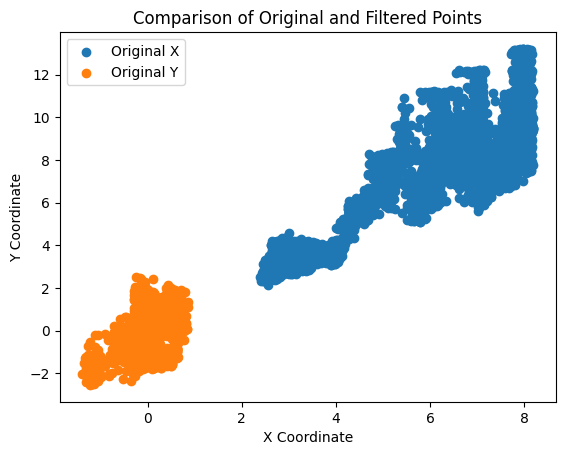

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Plot original points
for sheet_name, sheet_data in excel_data.items():
    if all(f'Column{step}' in sheet_data.columns for step in time_steps_to_plot):
        plt.scatter(sheet_data[f'Column{time_steps_to_plot[0]}'], sheet_data[f'Column{time_steps_to_plot[1]}'], label=f'Original {sheet_name}')

# Load the filtered data
filtered_file_path = '/content/particleLocations_filtered.xlsx'
filtered_data = pd.read_excel(filtered_file_path, sheet_name=None, header=0)

# Plot filtered points
for sheet_name, sheet_data in filtered_data.items():
    for pattern, pattern_data in sheet_data.items():
        pattern_data_df = pattern_data.to_frame().reset_index(drop=True)  # Convert Series to DataFrame
        if all(f'Column{step}' in pattern_data_df.columns for step in time_steps_to_plot):
            plt.scatter(pattern_data_df[f'Column{time_steps_to_plot[0]}'], pattern_data_df[f'Column{time_steps_to_plot[1]}'], label=f'Filtered {sheet_name} - Pattern {pattern}')

# Show the legend and labels
plt.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Comparison of Original and Filtered Points')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the time steps to plot
time_steps_to_plot = [0, 100, 149]

# Plot original points
for sheet_name, sheet_data in excel_data.items():
    if all(f'Column{step}' in sheet_data.columns for step in time_steps_to_plot):
        plt.scatter(
            sheet_data[f'Column{time_steps_to_plot[0]}'],
            sheet_data[f'Column{time_steps_to_plot[1]}'],
            label=f'Original {sheet_name}',
            s=50,  # Adjust the marker size as needed
            alpha=0.7  # Adjust transparency
        )

# Load the filtered data
filtered_file_path = '/content/particleLocations_filtered.xlsx'
filtered_data = pd.read_excel(filtered_file_path, sheet_name=None, header=0)

# Plot filtered points
for sheet_name, sheet_data in filtered_data.items():
    for pattern, pattern_data in sheet_data.items():
        pattern_data_df = pattern_data.to_frame().reset_index(drop=True)  # Convert Series to DataFrame
        if all(f'Column{step}' in pattern_data_df.columns for step in time_steps_to_plot):
            plt.scatter(
                pattern_data_df[f'Column{time_steps_to_plot[0]}'],
                pattern_data_df[f'Column{time_steps_to_plot[1]}'],
                label=f'Filtered {sheet_name} - Pattern {pattern}',
                s=50,  # Adjust the marker size as needed
                alpha=0.7  # Adjust transparency
            )

# Show the legend and labels
plt.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Comparison of Original and Filtered Points')
plt.show()

IndexError: list index out of range

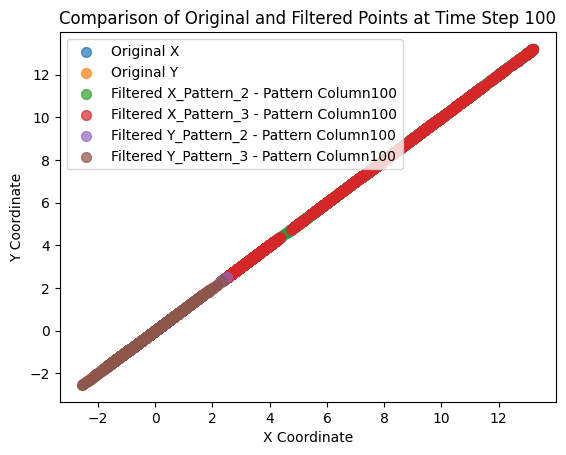

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Select the time step to plot
time_step_to_plot = 100

# Plot original points
for sheet_name, sheet_data in excel_data.items():
    if f'Column{time_step_to_plot}' in sheet_data.columns:
        plt.scatter(
            sheet_data['Column100'],
            sheet_data['Column100'],
            label=f'Original {sheet_name}',
            s=50,  # Adjust the marker size as needed
            alpha=0.7  # Adjust transparency
        )

# Load the filtered data
filtered_file_path = '/content/particleLocations_filtered.xlsx'
filtered_data = pd.read_excel(filtered_file_path, sheet_name=None, header=0)

# Plot filtered points
for sheet_name, sheet_data in filtered_data.items():
    for pattern, pattern_data in sheet_data.items():
        pattern_data_df = pattern_data.to_frame().reset_index(drop=True)  # Convert Series to DataFrame
        if f'Column{time_step_to_plot}' in pattern_data_df.columns:
            plt.scatter(
                pattern_data_df['Column100'],
                pattern_data_df['Column100'],
                label=f'Filtered {sheet_name} - Pattern {pattern}',
                s=50,  # Adjust the marker size as needed
                alpha=0.7  # Adjust transparency
            )

# Show the legend and labels
plt.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Comparison of Original and Filtered Points at Time Step {time_step_to_plot}')
plt.show()


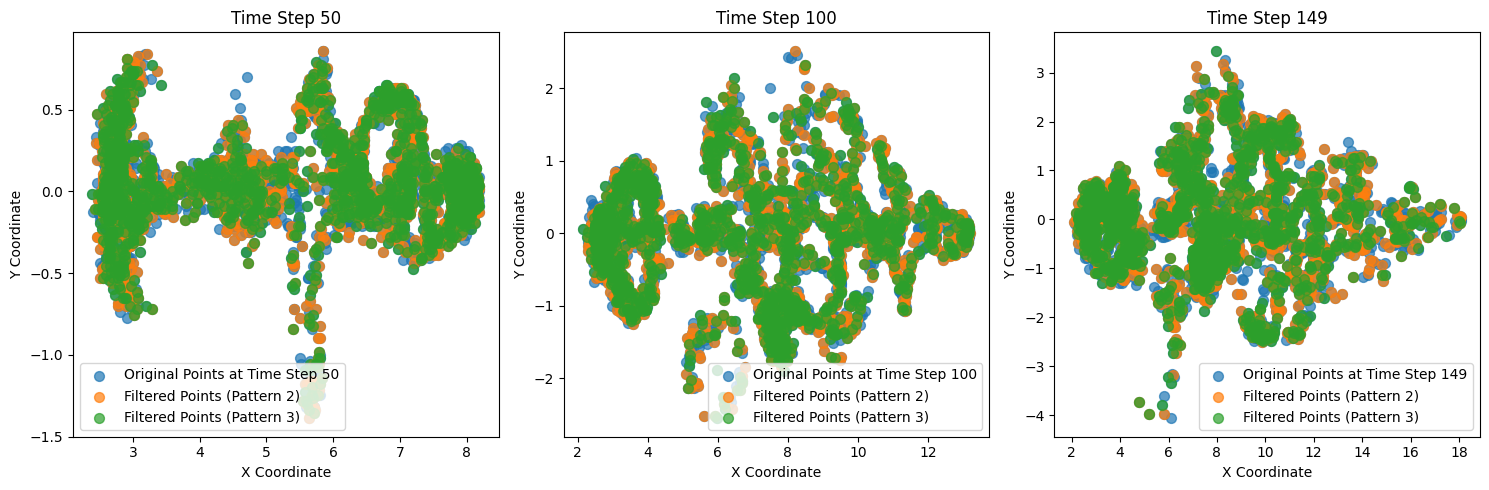

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Specify the patterns to filter
patterns = [2, 3]  # Add more patterns if needed

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(time_steps_to_plot), figsize=(15, 5))

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label=f'Original Points at Time Step {time_step}',
        s=50,  # Adjust the marker size as needed
        alpha=0.7  # Adjust transparency
    )

    # Plot filtered points for each pattern
    for pattern in patterns:
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        axes[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'Filtered Points (Pattern {pattern})',
            s=50,  # Adjust the marker size as needed
            alpha=0.7  # Adjust transparency
        )

    # Set subplot title and labels
    axes[i].set_title(f'Time Step {time_step}')
    axes[i].legend()
    axes[i].set_xlabel('X Coordinate')
    axes[i].set_ylabel('Y Coordinate')

# Adjust layout
plt.tight_layout()
plt.show()

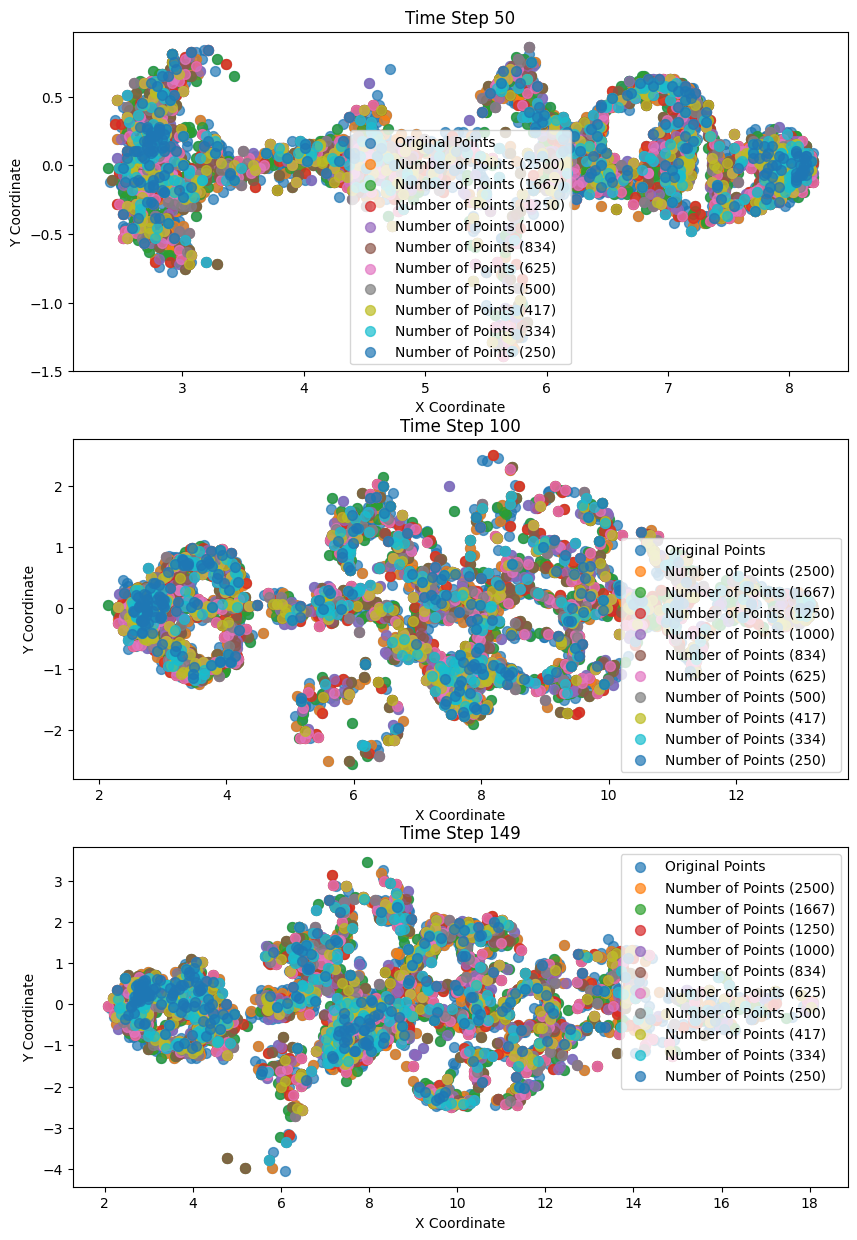

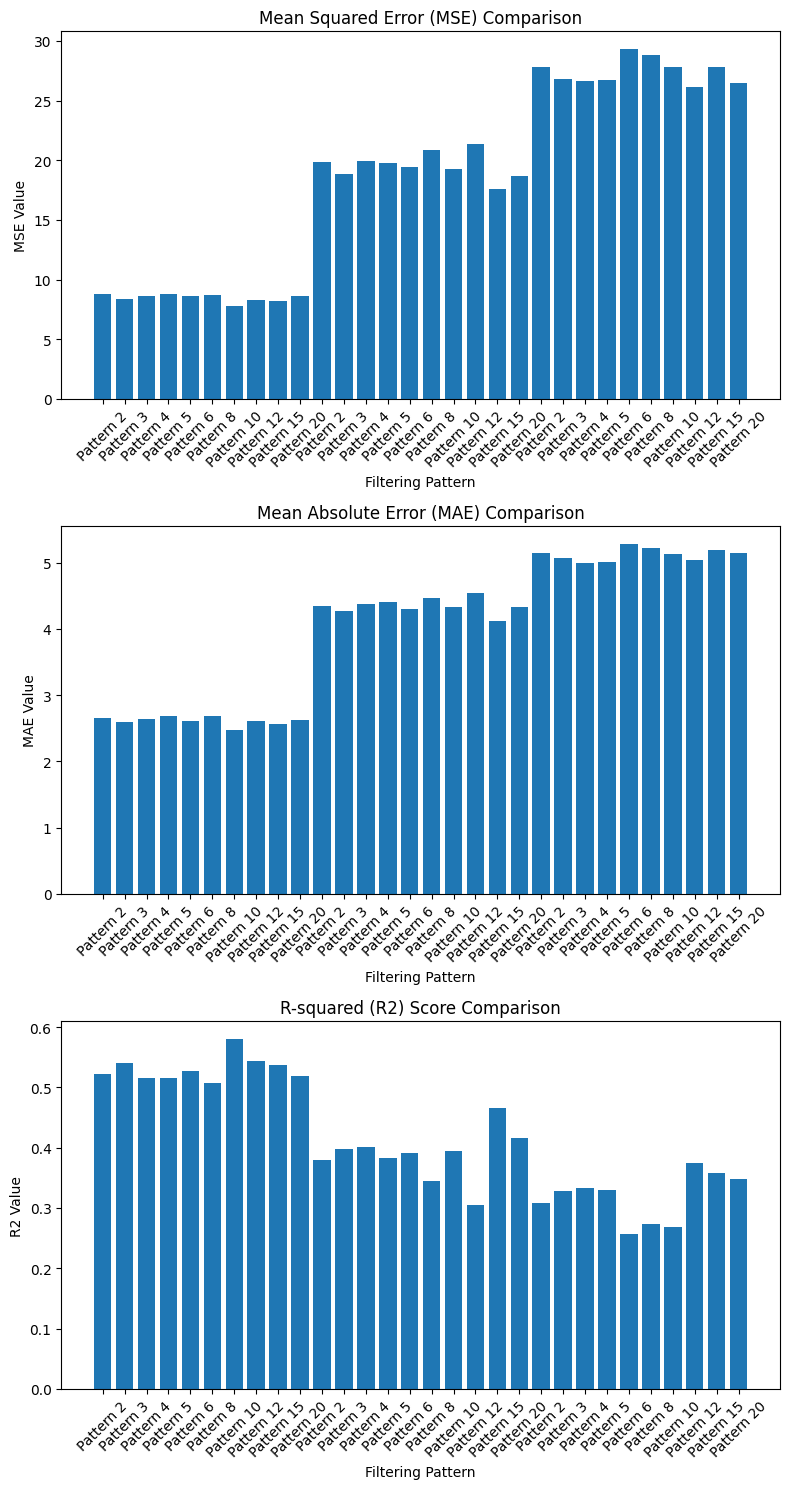

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]  # Updated patterns

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots for original points and filtered points
fig_points, axes_points = plt.subplots(nrows=len(time_steps_to_plot), ncols=1, figsize=(10, 15))

# Lists to store MSE, MAE, and R2 values for each pattern and time step
mse_values = []
mae_values = []
r2_values = []

# Create a dictionary to store filtered dataframes
filtered_dataframes = {}

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes_points[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label=f'Original Points',
        s=50,
        alpha=0.7
    )
    axes_points[i].set_title(f'Time Step {time_step}')
    axes_points[i].legend()
    axes_points[i].set_xlabel('X Coordinate')
    axes_points[i].set_ylabel('Y Coordinate')

    # Store original points in a dataframe
    original_points = pd.DataFrame({
        'X': x_data[f'Column{time_step}'],
        'Y': y_data[f'Column{time_step}']
    })

    # Create a dictionary to store filtered points
    filtered_points = {}

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Randomly sample the same number of points
        sampled_indices = np.random.choice(len(x_data), len(filtered_x_data), replace=False)
        sampled_x_data = x_data.iloc[sampled_indices]
        sampled_y_data = y_data.iloc[sampled_indices]

        # Plot filtered points
        axes_points[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'Number of Points ({len(filtered_x_data)})',  # Modified label
            s=50,
            alpha=0.7
        )
        axes_points[i].set_title(f'Time Step {time_step}')
        axes_points[i].legend()
        axes_points[i].set_xlabel('X Coordinate')
        axes_points[i].set_ylabel('Y Coordinate')

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([sampled_x_data[f'Column{time_step}'], sampled_y_data[f'Column{time_step}']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)

    # Store filtered dataframes in the dictionary
    filtered_dataframes[f'Time_Step_{time_step}'] = filtered_points

# Save the filtered data to an Excel file with a sheet for metrics
output_file_path = '/content/particleLocations_filtered_metrics.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for time_step, filtered_points_df in filtered_dataframes.items():
        for pattern, df in filtered_points_df.items():
            df.to_excel(writer, sheet_name=f'{time_step}_{pattern}', index=False)

# Create subplots for displaying metrics
fig_metrics, axes_metrics = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Add a subplot for displaying MSE values
axes_metrics[0].bar(range(len(mse_values)), mse_values, tick_label=[f'Pattern {pattern}' for pattern in patterns] * len(time_steps_to_plot))
axes_metrics[0].set_title('Mean Squared Error (MSE) Comparison')
axes_metrics[0].set_ylabel('MSE Value')
axes_metrics[0].set_xlabel('Filtering Pattern')
axes_metrics[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add a subplot for displaying MAE values
axes_metrics[1].bar(range(len(mae_values)), mae_values, tick_label=[f'Pattern {pattern}' for pattern in patterns] * len(time_steps_to_plot))
axes_metrics[1].set_title('Mean Absolute Error (MAE) Comparison')
axes_metrics[1].set_ylabel('MAE Value')
axes_metrics[1].set_xlabel('Filtering Pattern')
axes_metrics[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add a subplot for displaying R2 values
axes_metrics[2].bar(range(len(r2_values)), r2_values, tick_label=[f'Pattern {pattern}' for pattern in patterns] * len(time_steps_to_plot))
axes_metrics[2].set_title('R-squared (R2) Score Comparison')
axes_metrics[2].set_ylabel('R2 Value')
axes_metrics[2].set_xlabel('Filtering Pattern')
axes_metrics[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()


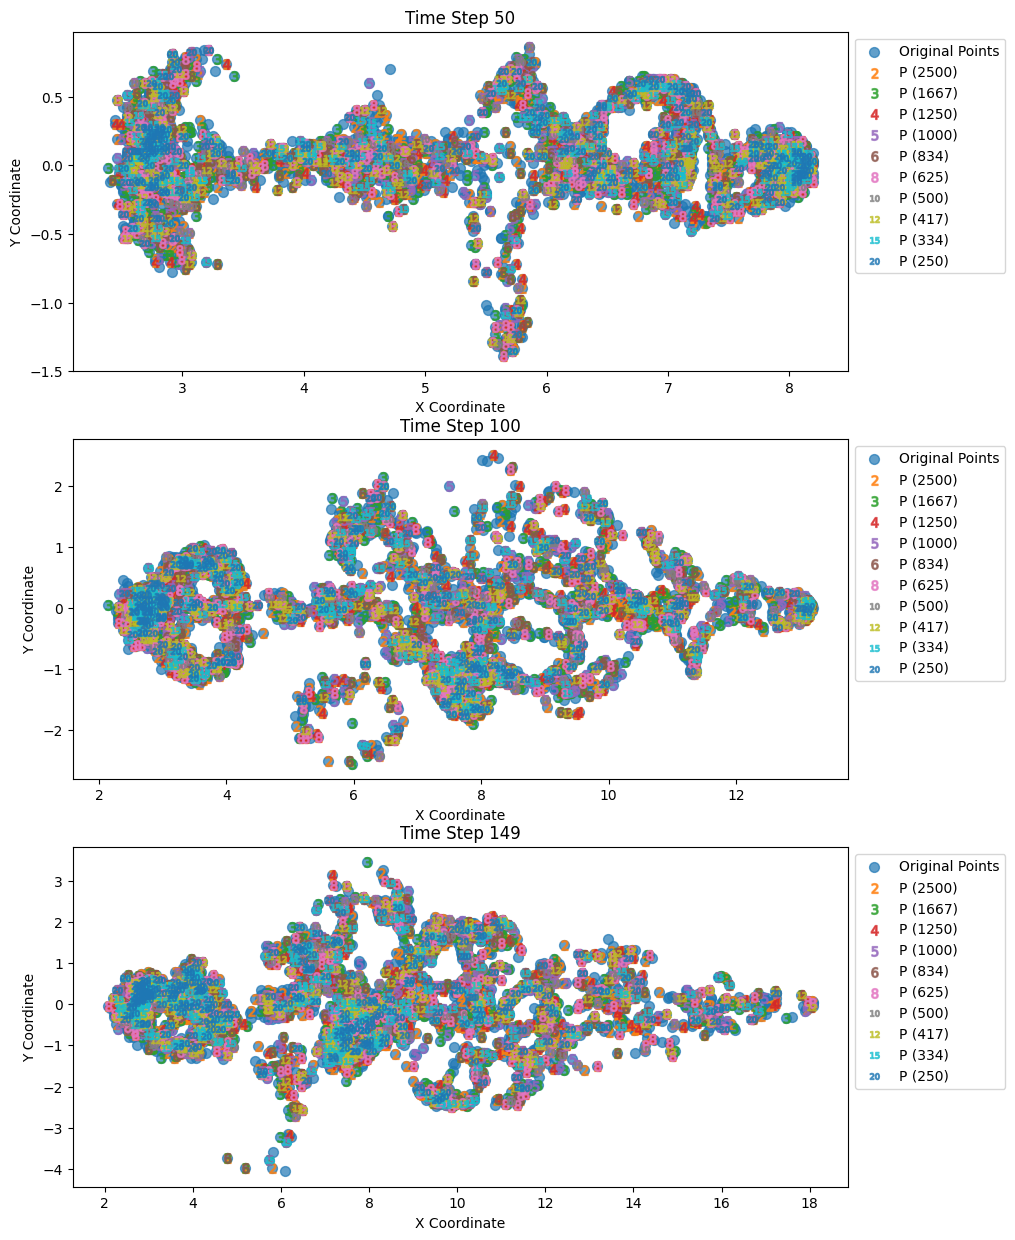

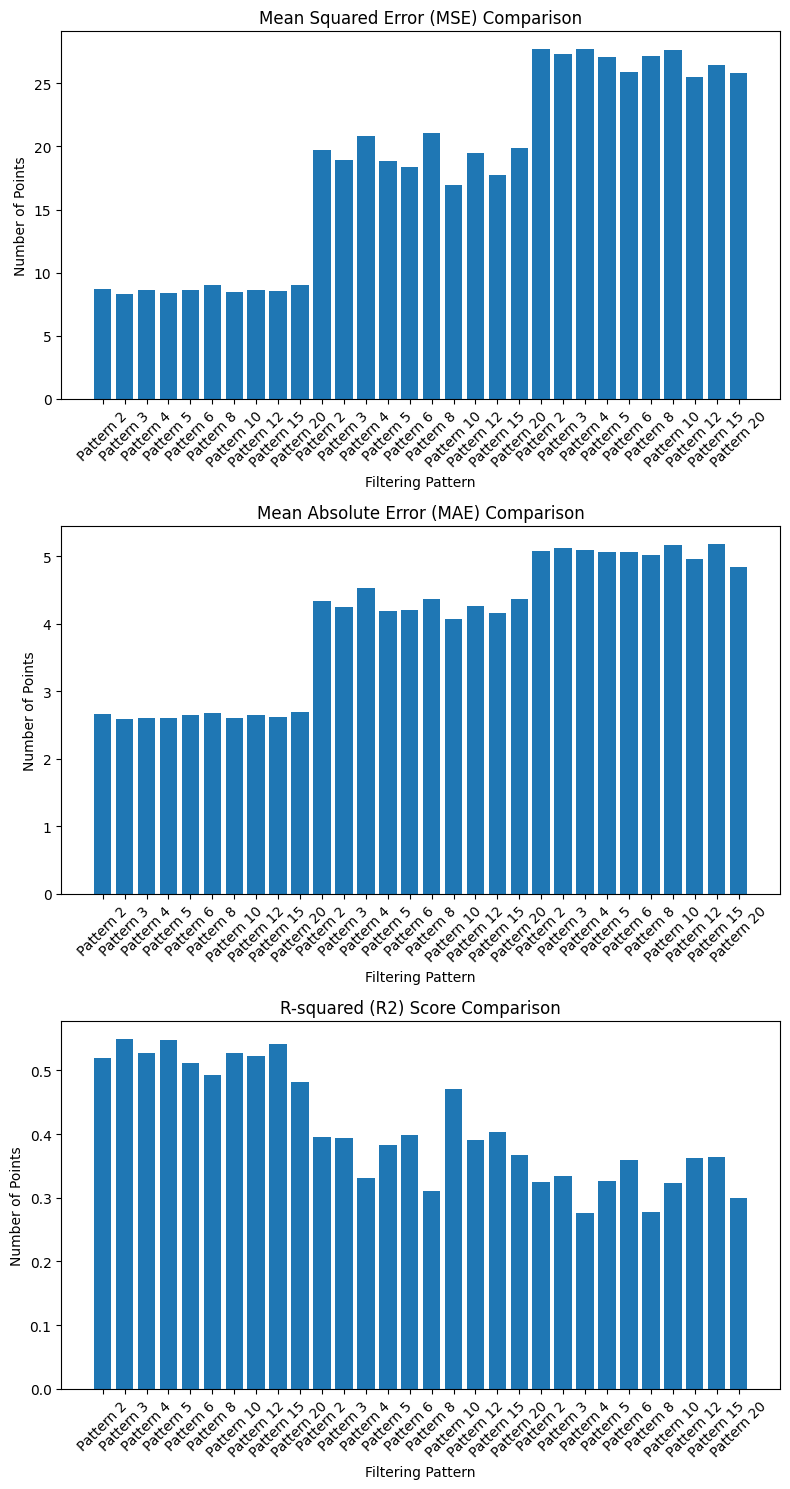

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]  # Updated patterns

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots for original points and filtered points
fig_points, axes_points = plt.subplots(nrows=len(time_steps_to_plot), ncols=1, figsize=(10, 15))

# Lists to store MSE, MAE, and R2 values for each pattern and time step
mse_values = []
mae_values = []
r2_values = []

# Create a dictionary to store filtered dataframes
filtered_dataframes = {}

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes_points[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label='Original Points',
        s=50,
        alpha=0.7,
        marker='o'  # Use a circular marker for original points
    )
    axes_points[i].set_title(f'Time Step {time_step}')
    axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside in the right side
    axes_points[i].set_xlabel('X Coordinate')
    axes_points[i].set_ylabel('Y Coordinate')

    # Store original points in a dataframe
    original_points = pd.DataFrame({
        'X': x_data[f'Column{time_step}'],
        'Y': y_data[f'Column{time_step}']
    })

    # Create a dictionary to store filtered points
    filtered_points = {}

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Randomly sample the same number of points
        sampled_indices = np.random.choice(len(x_data), len(filtered_x_data), replace=False)
        sampled_x_data = x_data.iloc[sampled_indices]
        sampled_y_data = y_data.iloc[sampled_indices]

        # Plot filtered points
        axes_points[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'P ({len(filtered_x_data)})',  # Modified label
            s=50,
            alpha=0.7,
            marker=f'${pattern}$'  # Use different markers for different patterns
        )
        axes_points[i].set_title(f'Time Step {time_step}')
        axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside in the right side
        axes_points[i].set_xlabel('X Coordinate')
        axes_points[i].set_ylabel('Y Coordinate')

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([sampled_x_data[f'Column{time_step}'], sampled_y_data[f'Column{time_step}']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)

    # Store filtered dataframes in the dictionary
    filtered_dataframes[f'Time_Step_{time_step}'] = filtered_points

# Save the filtered data to an Excel file with a sheet for metrics
output_file_path = '/content/particleLocations_filtered_metrics.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for time_step, filtered_points_df in filtered_dataframes.items():
        for pattern, df in filtered_points_df.items():
            df.to_excel(writer, sheet_name=f'{time_step}_{pattern}', index=False)

# Create subplots for displaying metrics
fig_metrics, axes_metrics = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Add a subplot for displaying MSE values
axes_metrics[0].bar(range(len(mse_values)), mse_values, tick_label=[f'Pattern {pattern}' for pattern in patterns] * len(time_steps_to_plot))
axes_metrics[0].set_title('Mean Squared Error (MSE) Comparison')
axes_metrics[0].set_ylabel('Number of Points')  # Updated ylabel
axes_metrics[0].set_xlabel('Filtering Pattern')
axes_metrics[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add a subplot for displaying MAE values
axes_metrics[1].bar(range(len(mae_values)), mae_values, tick_label=[f'Pattern {pattern}' for pattern in patterns] * len(time_steps_to_plot))
axes_metrics[1].set_title('Mean Absolute Error (MAE) Comparison')
axes_metrics[1].set_ylabel('Number of Points')  # Updated ylabel
axes_metrics[1].set_xlabel('Filtering Pattern')
axes_metrics[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add a subplot for displaying R2 values
axes_metrics[2].bar(range(len(r2_values)), r2_values, tick_label=[f'Pattern {pattern}' for pattern in patterns] * len(time_steps_to_plot))
axes_metrics[2].set_title('R-squared (R2) Score Comparison')
axes_metrics[2].set_ylabel('Number of Points')  # Updated ylabel
axes_metrics[2].set_xlabel('Filtering Pattern')
axes_metrics[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()

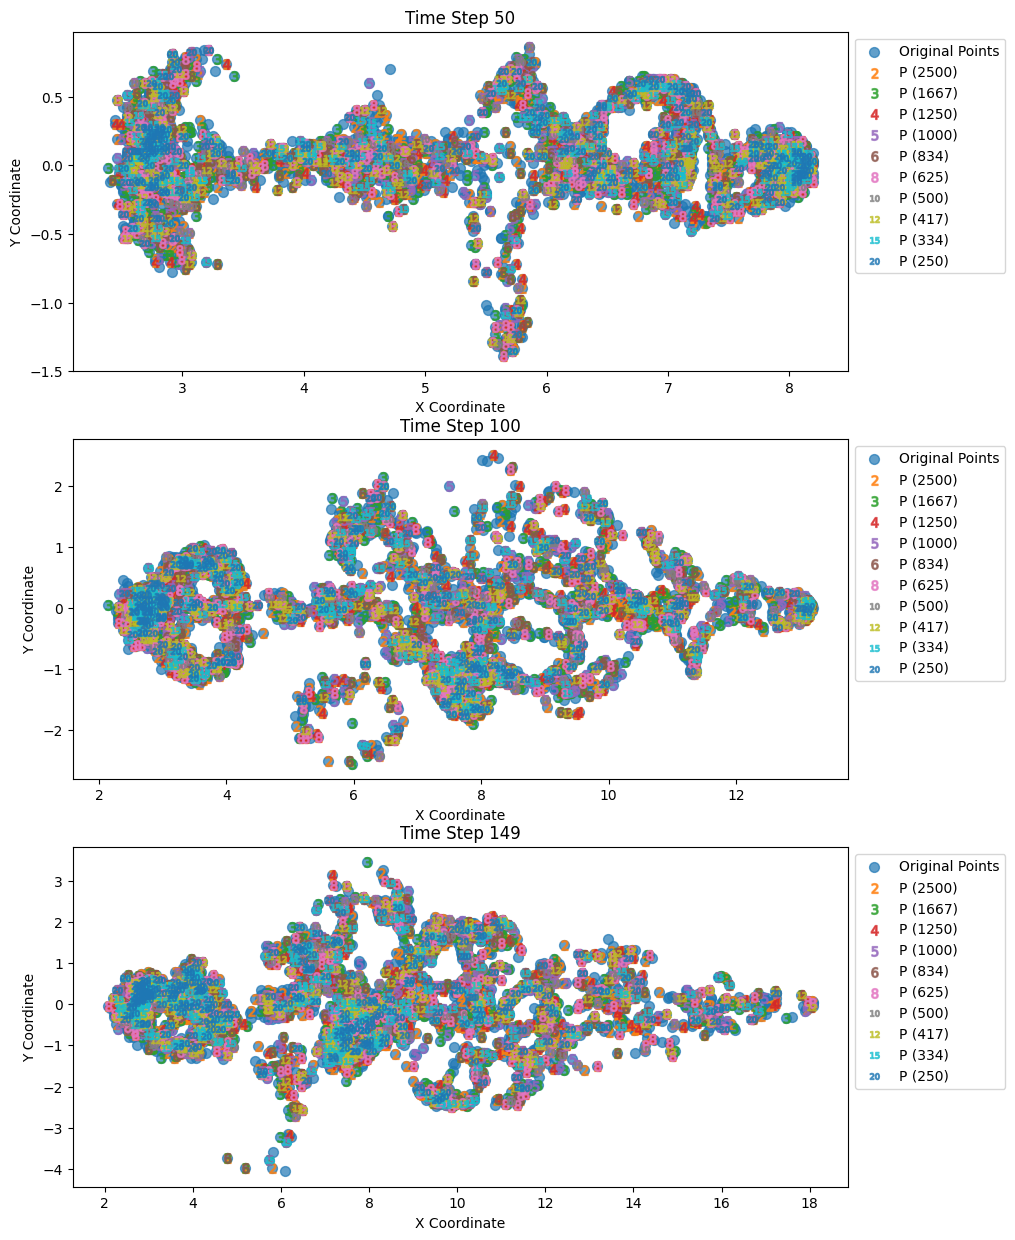

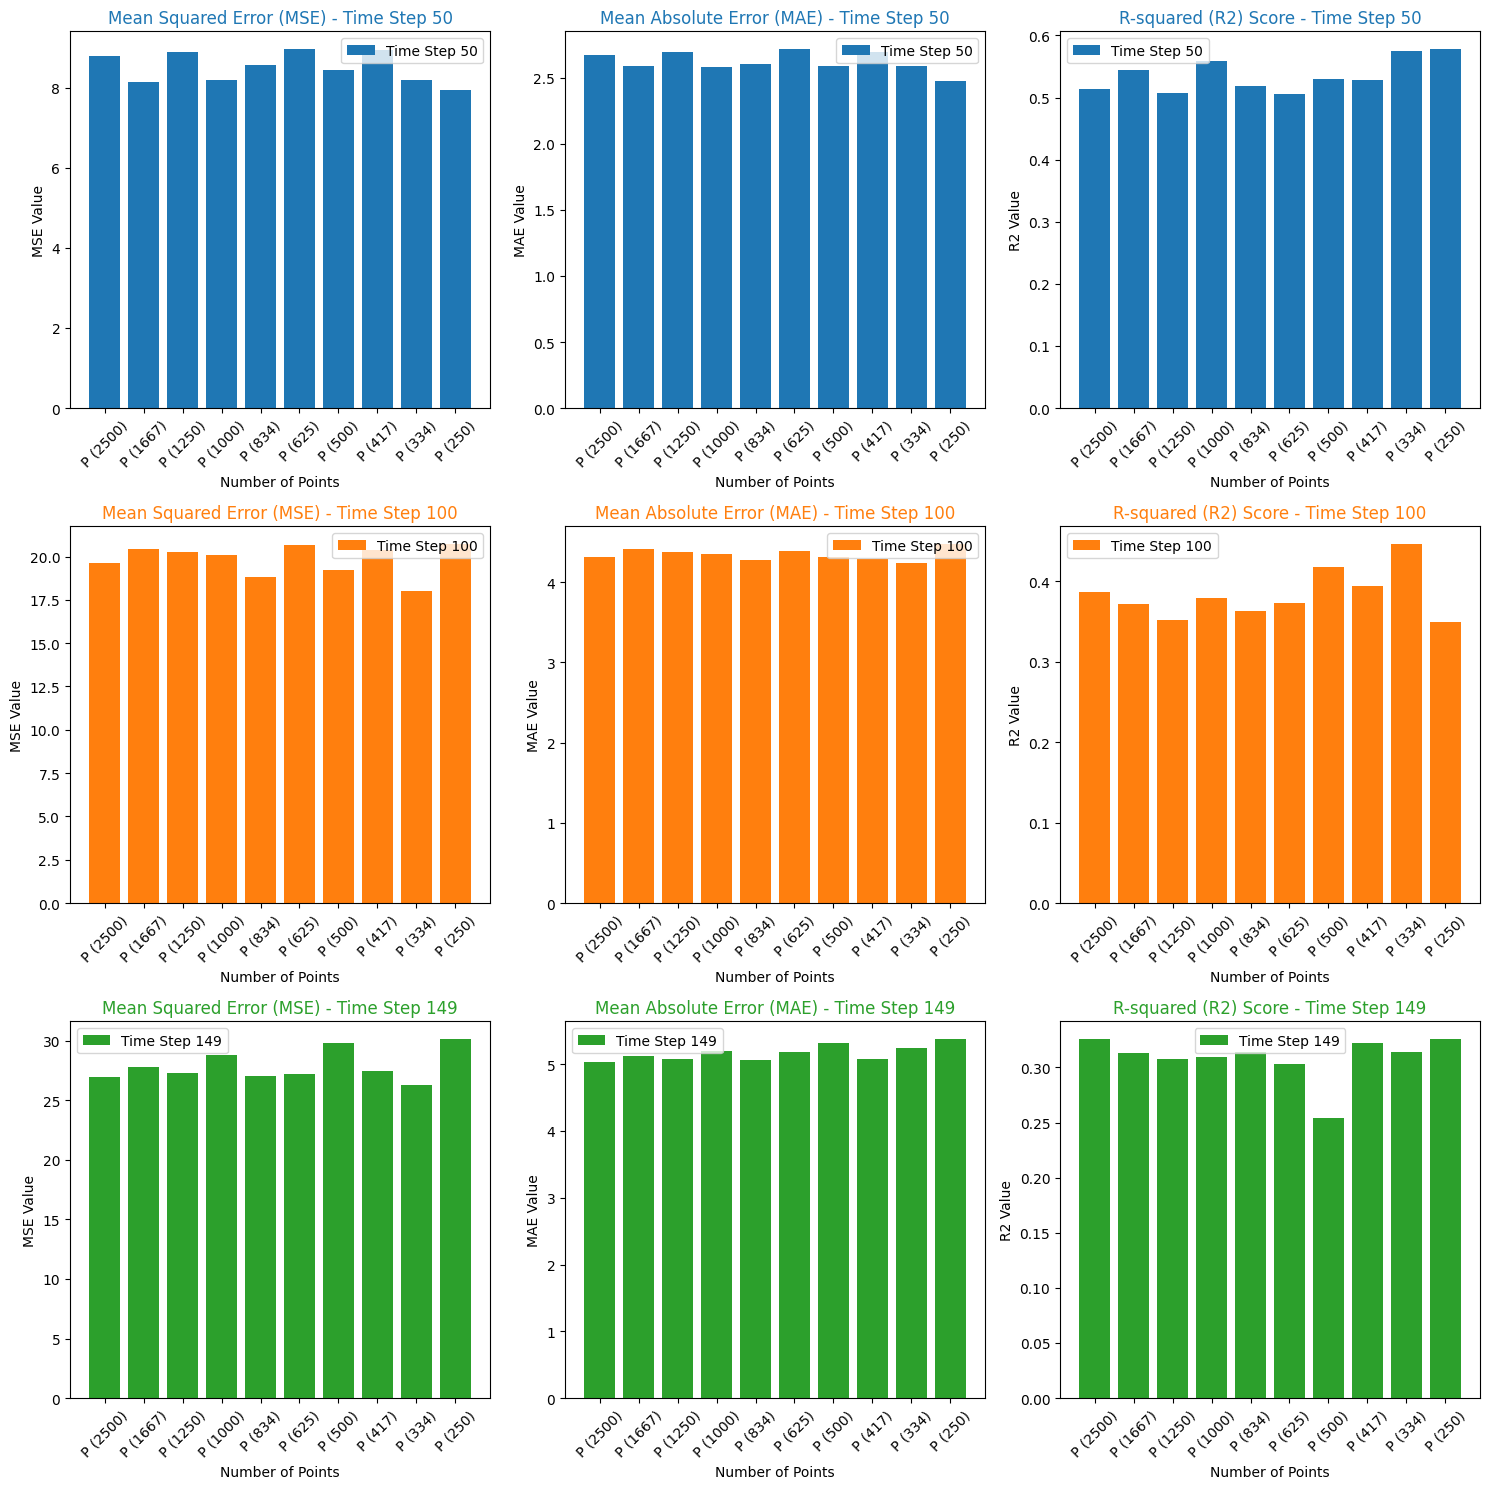

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]  # Updated patterns

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots for original points and filtered points
fig_points, axes_points = plt.subplots(nrows=len(time_steps_to_plot), ncols=1, figsize=(10, 15))

# Lists to store MSE, MAE, and R2 values for each pattern and time step
mse_values = []
mae_values = []
r2_values = []

# Create a dictionary to store filtered dataframes
filtered_dataframes = {}

# Lists to store labels for each pattern
mse_labels = []
mae_labels = []
r2_labels = []

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes_points[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label='Original Points',
        s=50,
        alpha=0.7,
        marker='o'  # Use a circular marker for original points
    )
    axes_points[i].set_title(f'Time Step {time_step}')
    axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
    axes_points[i].set_xlabel('X Coordinate')
    axes_points[i].set_ylabel('Y Coordinate')

    # Store original points in a dataframe
    original_points = pd.DataFrame({
        'X': x_data[f'Column{time_step}'],
        'Y': y_data[f'Column{time_step}']
    })

    # Create a dictionary to store filtered points
    filtered_points = {}

    # Lists to store labels for each pattern
    mse_labels_time_step = []
    mae_labels_time_step = []
    r2_labels_time_step = []

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Randomly sample the same number of points
        sampled_indices = np.random.choice(len(x_data), len(filtered_x_data), replace=False)
        sampled_x_data = x_data.iloc[sampled_indices]
        sampled_y_data = y_data.iloc[sampled_indices]

        # Plot filtered points
        axes_points[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'P ({len(filtered_x_data)})',  # Modified label
            s=50,
            alpha=0.7,
            marker=f'${pattern}$'  # Use different markers for different patterns
        )
        axes_points[i].set_title(f'Time Step {time_step}')
        axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
        axes_points[i].set_xlabel('X Coordinate')
        axes_points[i].set_ylabel('Y Coordinate')

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([sampled_x_data[f'Column{time_step}'], sampled_y_data[f'Column{time_step}']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)

        # Store labels for each pattern
        mse_labels_time_step.append(f'P ({len(filtered_x_data)})')
        mae_labels_time_step.append(f'P ({len(filtered_x_data)})')
        r2_labels_time_step.append(f'P ({len(filtered_x_data)})')

    # Store filtered dataframes in the dictionary
    filtered_dataframes[f'Time_Step_{time_step}'] = filtered_points

    # Store labels for each pattern and time step
    mse_labels.append(mse_labels_time_step)
    mae_labels.append(mae_labels_time_step)
    r2_labels.append(r2_labels_time_step)

# Save the filtered data to an Excel file with a sheet for metrics
output_file_path = '/content/particleLocations_filtered_metrics.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for time_step, filtered_points_df in filtered_dataframes.items():
        for pattern, df in filtered_points_df.items():
            df.to_excel(writer, sheet_name=f'{time_step}_{pattern}', index=False)

# Create subplots for displaying metrics
fig_metrics, axes_metrics = plt.subplots(nrows=len(time_steps_to_plot), ncols=3, figsize=(15, 15))

# Add subplots for displaying MSE, MAE, and R2 values for each time step
for i, time_step in enumerate(time_steps_to_plot):
    # Add a subplot for displaying MSE values
    axes_metrics[i, 0].bar(range(len(patterns)), mse_values[i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=mse_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 0].set_title(f'Mean Squared Error (MSE) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 0].set_ylabel('MSE Value')  # Updated ylabel
    axes_metrics[i, 0].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 0].legend()

    # Add a subplot for displaying MAE values
    axes_metrics[i, 1].bar(range(len(patterns)), mae_values[i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=mae_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 1].set_title(f'Mean Absolute Error (MAE) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 1].set_ylabel('MAE Value')  # Updated ylabel
    axes_metrics[i, 1].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 1].legend()

    # Add a subplot for displaying R2 values
    axes_metrics[i, 2].bar(range(len(patterns)), r2_values[i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=r2_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 2].set_title(f'R-squared (R2) Score - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 2].set_ylabel('R2 Value')  # Updated ylabel
    axes_metrics[i, 2].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

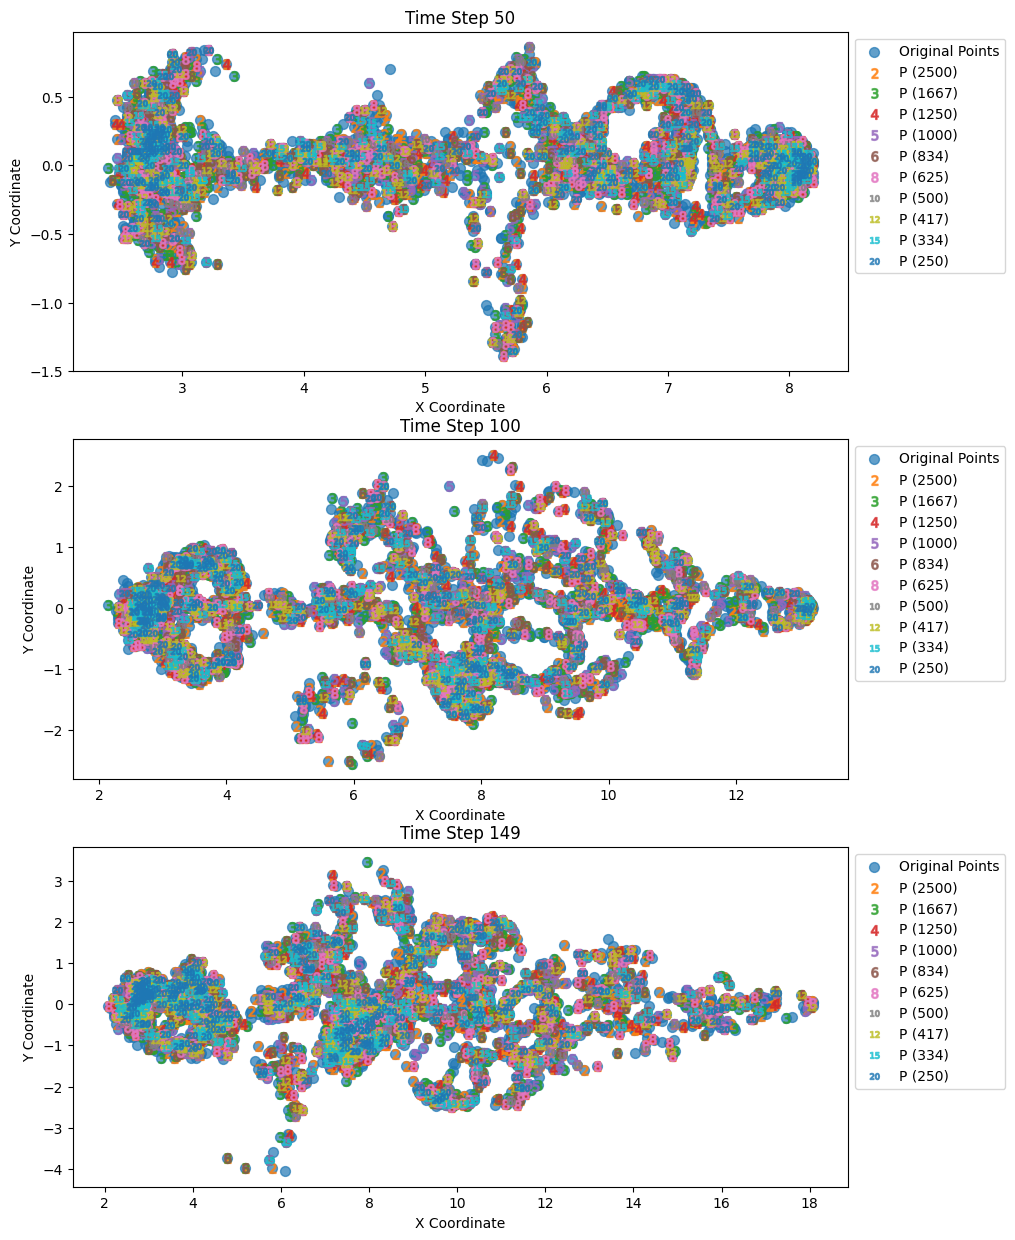

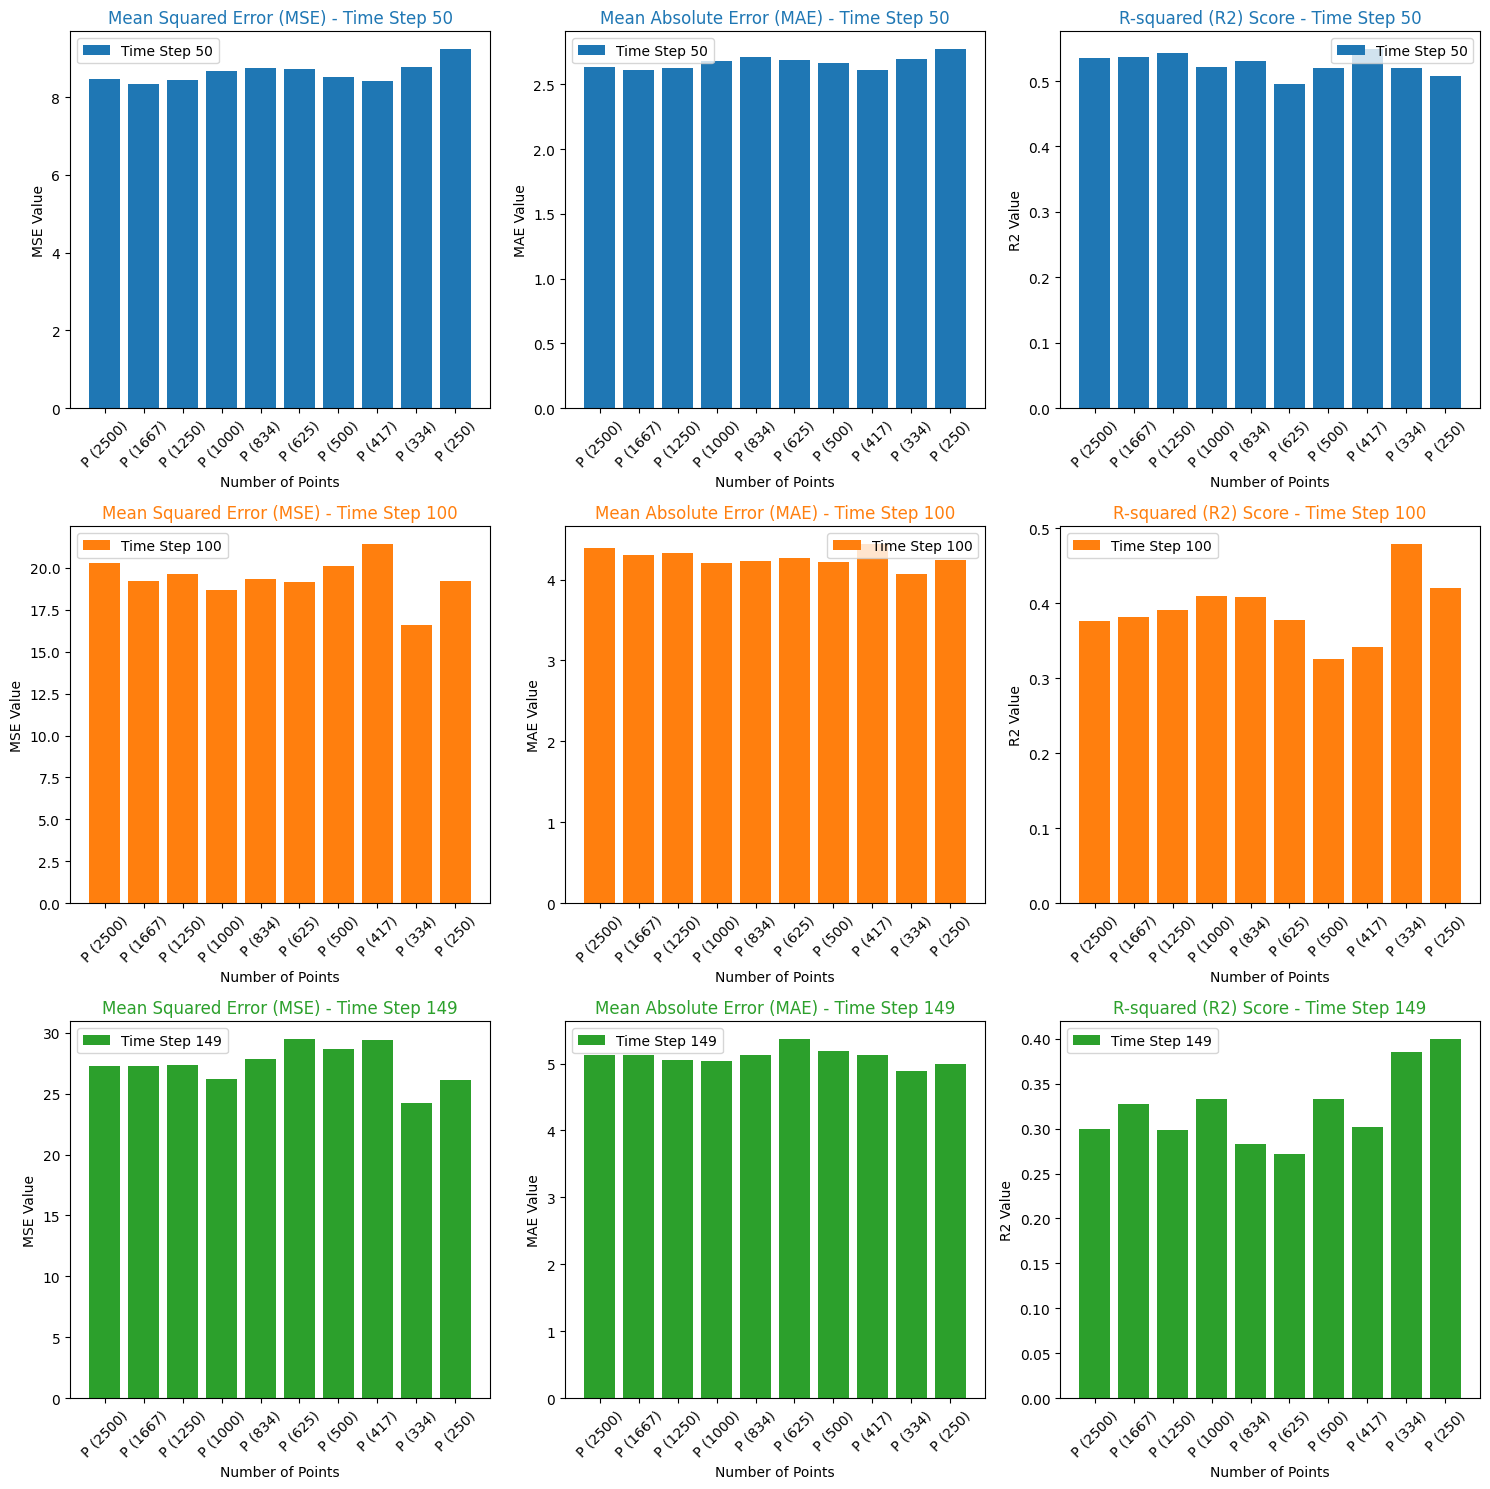

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy.stats import ks_2samp

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Function to calculate distance from mean point
def calculate_distance_from_mean(original_df, filtered_df):
    original_mean = original_df.mean()
    distances = np.sqrt((filtered_df['X'] - original_mean['X'])**2 + (filtered_df['Y'] - original_mean['Y'])**2)
    return distances.mean()

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots for original points and filtered points
fig_points, axes_points = plt.subplots(nrows=len(time_steps_to_plot), ncols=1, figsize=(10, 15))

# Lists to store metrics values for each pattern and time step
metrics_values = {
    'mse': [],
    'mae': [],
    'r2': [],
    'distance_from_mean': [],
    'ks_statistic_x': [],
    'ks_p_value_x': [],
    'ks_statistic_y': [],
    'ks_p_value_y': []
}

# Create a dictionary to store filtered dataframes
filtered_dataframes = {}

# Lists to store labels for each pattern
mse_labels = []
mae_labels = []
r2_labels = []
distance_from_mean_labels = []
ks_labels_x = []
ks_labels_y = []

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes_points[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label='Original Points',
        s=50,
        alpha=0.7,
        marker='o'  # Use a circular marker for original points
    )
    axes_points[i].set_title(f'Time Step {time_step}')
    axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
    axes_points[i].set_xlabel('X Coordinate')
    axes_points[i].set_ylabel('Y Coordinate')

    # Store original points in a dataframe
    original_points = pd.DataFrame({
        'X': x_data[f'Column{time_step}'],
        'Y': y_data[f'Column{time_step}']
    })

    # Create a dictionary to store filtered points
    filtered_points = {}

    # Lists to store labels for each pattern
    mse_labels_time_step = []
    mae_labels_time_step = []
    r2_labels_time_step = []
    distance_from_mean_labels_time_step = []
    ks_labels_x_time_step = []
    ks_labels_y_time_step = []

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Randomly sample the same number of points
        sampled_indices = np.random.choice(len(x_data), len(filtered_x_data), replace=False)
        sampled_x_data = x_data.iloc[sampled_indices]
        sampled_y_data = y_data.iloc[sampled_indices]

        # Plot filtered points
        axes_points[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'P ({len(filtered_x_data)})',  # Modified label
            s=50,
            alpha=0.7,
            marker=f'${pattern}$'  # Use different markers for different patterns
        )
        axes_points[i].set_title(f'Time Step {time_step}')
        axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
        axes_points[i].set_xlabel('X Coordinate')
        axes_points[i].set_ylabel('Y Coordinate')

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([sampled_x_data[f'Column{time_step}'], sampled_y_data[f'Column{time_step}']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )

        distance_from_mean = calculate_distance_from_mean(original_points, filtered_points[f'Pattern_{pattern}'])
        ks_statistic_x, ks_p_value_x = ks_2samp(sampled_x_data[f'Column{time_step}'], filtered_x_data[f'Column{time_step}'])
        ks_statistic_y, ks_p_value_y = ks_2samp(sampled_y_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}'])

        # Append values to lists
        metrics_values['mse'].append(mse)
        metrics_values['mae'].append(mae)
        metrics_values['r2'].append(r2)
        metrics_values['distance_from_mean'].append(distance_from_mean)
        metrics_values['ks_statistic_x'].append(ks_statistic_x)
        metrics_values['ks_p_value_x'].append(ks_p_value_x)
        metrics_values['ks_statistic_y'].append(ks_statistic_y)
        metrics_values['ks_p_value_y'].append(ks_p_value_y)

        # Store labels for each pattern
        mse_labels_time_step.append(f'P ({len(filtered_x_data)})')
        mae_labels_time_step.append(f'P ({len(filtered_x_data)})')
        r2_labels_time_step.append(f'P ({len(filtered_x_data)})')
        distance_from_mean_labels_time_step.append(f'P ({len(filtered_x_data)})')
        ks_labels_x_time_step.append(f'P ({len(filtered_x_data)})')
        ks_labels_y_time_step.append(f'P ({len(filtered_x_data)})')

    # Store filtered dataframes in the dictionary
    filtered_dataframes[f'Time_Step_{time_step}'] = filtered_points

    # Store labels for each pattern and time step
    mse_labels.append(mse_labels_time_step)
    mae_labels.append(mae_labels_time_step)
    r2_labels.append(r2_labels_time_step)
    distance_from_mean_labels.append(distance_from_mean_labels_time_step)
    ks_labels_x.append(ks_labels_x_time_step)
    ks_labels_y.append(ks_labels_y_time_step)

# Function to calculate distance from mean point
def calculate_distance_from_mean(original_df, filtered_df):
    original_mean = original_df.mean()
    distances = np.sqrt((filtered_df['X'] - original_mean['X'])**2 + (filtered_df['Y'] - original_mean['Y'])**2)
    return distances.mean()

# Save the filtered data to an Excel file with a sheet for metrics
output_file_path = '/content/particleLocations_filtered_metrics_random_sampling.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for time_step, filtered_points_df in filtered_dataframes.items():
        for pattern, df in filtered_points_df.items():
            df.to_excel(writer, sheet_name=f'{time_step}_{pattern}', index=False)

# Create subplots for displaying metrics
fig_metrics, axes_metrics = plt.subplots(nrows=len(time_steps_to_plot), ncols=3, figsize=(15, 15))

# Add subplots for displaying MSE, MAE, and R2 values for each time step
for i, time_step in enumerate(time_steps_to_plot):
    # Add a subplot for displaying MSE values
    axes_metrics[i, 0].bar(range(len(patterns)), metrics_values['mse'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=mse_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 0].set_title(f'Mean Squared Error (MSE) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 0].set_ylabel('MSE Value')  # Updated ylabel
    axes_metrics[i, 0].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 0].legend()

    # Add a subplot for displaying MAE values
    axes_metrics[i, 1].bar(range(len(patterns)), metrics_values['mae'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=mae_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 1].set_title(f'Mean Absolute Error (MAE) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 1].set_ylabel('MAE Value')  # Updated ylabel
    axes_metrics[i, 1].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 1].legend()

    # Add a subplot for displaying R2 values
    axes_metrics[i, 2].bar(range(len(patterns)), metrics_values['r2'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=r2_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 2].set_title(f'R-squared (R2) Score - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 2].set_ylabel('R2 Value')  # Updated ylabel
    axes_metrics[i, 2].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

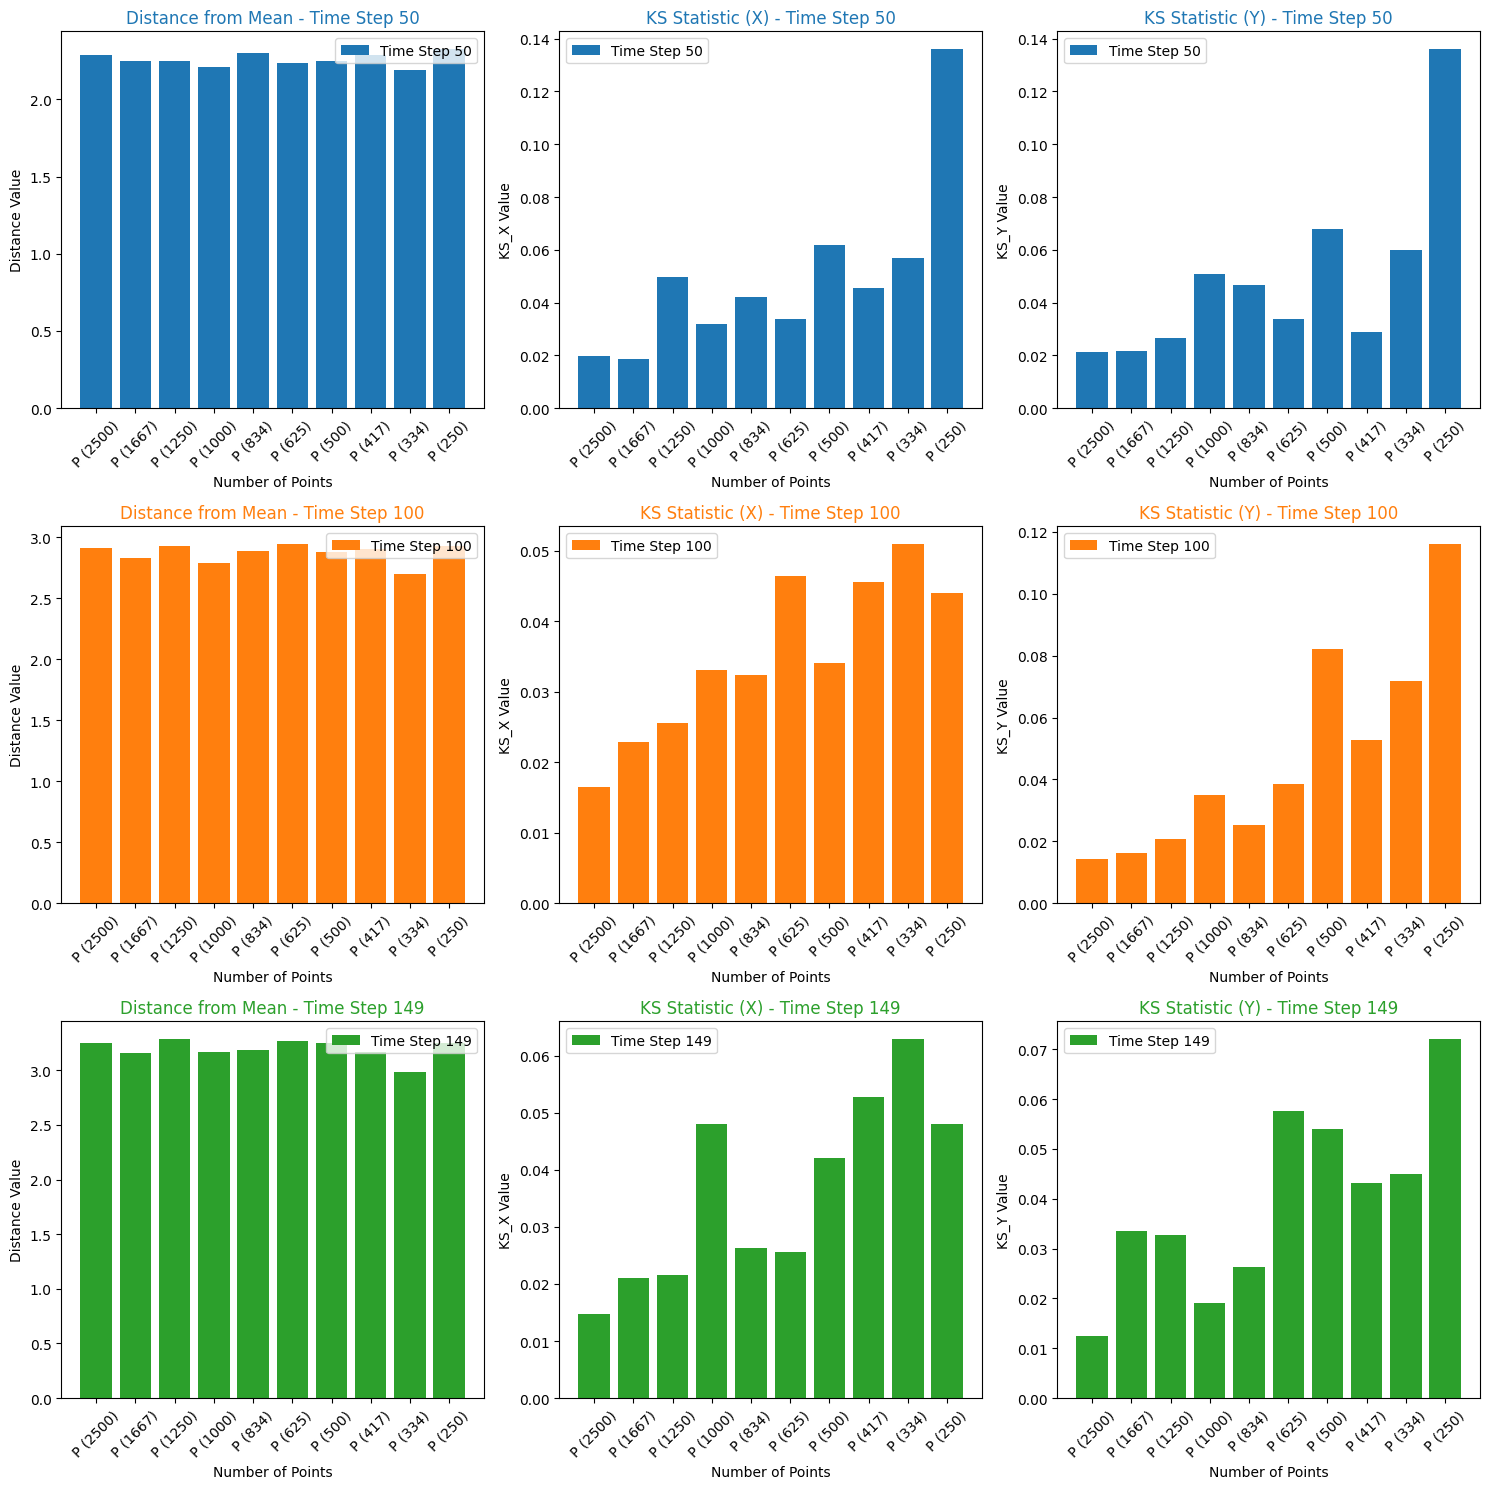

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy.stats import ks_2samp

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Function to calculate distance from mean point
def calculate_distance_from_mean(original_df, filtered_df):
    original_mean = original_df.mean()
    distances = np.sqrt((filtered_df['X'] - original_mean['X'])**2 + (filtered_df['Y'] - original_mean['Y'])**2)
    return distances.mean()

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Lists to store metric values for each pattern and time step
distance_values = []
ks_x_values = []
ks_y_values = []

# Lists to store labels for each pattern
distance_labels = []
ks_x_labels = []
ks_y_labels = []

# Create subplots for displaying metrics
fig_metrics_extra, axes_metrics_extra = plt.subplots(nrows=len(time_steps_to_plot), ncols=3, figsize=(15, 15))

for i, time_step in enumerate(time_steps_to_plot):
    # Create a dictionary to store filtered points
    filtered_points = {}

    # Lists to store labels for each pattern
    distance_labels_time_step = []
    ks_x_labels_time_step = []
    ks_y_labels_time_step = []

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Randomly sample the same number of points
        sampled_indices = np.random.choice(len(x_data), len(filtered_x_data), replace=False)
        sampled_x_data = x_data.iloc[sampled_indices]
        sampled_y_data = y_data.iloc[sampled_indices]

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([sampled_x_data[f'Column{time_step}'], sampled_y_data[f'Column{time_step}']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )
        distance = calculate_distance_from_mean(original_points, filtered_points[f'Pattern_{pattern}'])
        ks_statistic_x, _ = ks_2samp(sampled_x_data[f'Column{time_step}'], filtered_x_data[f'Column{time_step}'])
        ks_statistic_y, _ = ks_2samp(sampled_y_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}'])

        # Append values to lists
        distance_values.append(distance)
        ks_x_values.append(ks_statistic_x)
        ks_y_values.append(ks_statistic_y)

        # Append labels to lists
        distance_labels_time_step.append(f'P ({len(filtered_x_data)})')
        ks_x_labels_time_step.append(f'P ({len(filtered_x_data)})')
        ks_y_labels_time_step.append(f'P ({len(filtered_x_data)})')

    # Store labels for each pattern and time step
    distance_labels.append(distance_labels_time_step)
    ks_x_labels.append(ks_x_labels_time_step)
    ks_y_labels.append(ks_y_labels_time_step)

    # Add subplots for displaying distance, KS_X, and KS_Y values for each time step
    # Add a subplot for displaying distance values
    axes_metrics_extra[i, 0].bar(range(len(patterns)), distance_values[i * len(patterns):(i + 1) * len(patterns)],
                                tick_label=distance_labels[i],
                                label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics_extra[i, 0].set_title(f'Distance from Mean - Time Step {time_step}', color=f'C{i}')
    axes_metrics_extra[i, 0].set_ylabel('Distance Value')  # Updated ylabel
    axes_metrics_extra[i, 0].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics_extra[i, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics_extra[i, 0].legend()

    # Add a subplot for displaying KS_X values
    axes_metrics_extra[i, 1].bar(range(len(patterns)), ks_x_values[i * len(patterns):(i + 1) * len(patterns)],
                                 tick_label=ks_x_labels[i],
                                 label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics_extra[i, 1].set_title(f'KS Statistic (X) - Time Step {time_step}', color=f'C{i}')
    axes_metrics_extra[i, 1].set_ylabel('KS_X Value')  # Updated ylabel
    axes_metrics_extra[i, 1].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics_extra[i, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics_extra[i, 1].legend()

    # Add a subplot for displaying KS_Y values
    axes_metrics_extra[i, 2].bar(range(len(patterns)), ks_y_values[i * len(patterns):(i + 1) * len(patterns)],
                                 tick_label=ks_y_labels[i],
                                 label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics_extra[i, 2].set_title(f'KS Statistic (Y) - Time Step {time_step}', color=f'C{i}')
    axes_metrics_extra[i, 2].set_ylabel('KS_Y Value')  # Updated ylabel
    axes_metrics_extra[i, 2].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics_extra[i, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics_extra[i, 2].legend()

# Adjust layout
plt.tight_layout()

# Save the metrics data to an Excel file
output_metrics_file_path = '/content/particleLocations_metrics.xlsx'
with pd.ExcelWriter(output_metrics_file_path) as writer:
    for i, time_step in enumerate(time_steps_to_plot):
        metrics_df = pd.DataFrame({
            'Pattern': distance_labels[i],
            'Distance from Mean': distance_values[i * len(patterns):(i + 1) * len(patterns)],
            'KS Statistic (X)': ks_x_values[i * len(patterns):(i + 1) * len(patterns)],
            'KS Statistic (Y)': ks_y_values[i * len(patterns):(i + 1) * len(patterns)],
        })
        metrics_df.to_excel(writer, sheet_name=f'Time_Step_{time_step}', index=False)

# Show the plots
plt.show()


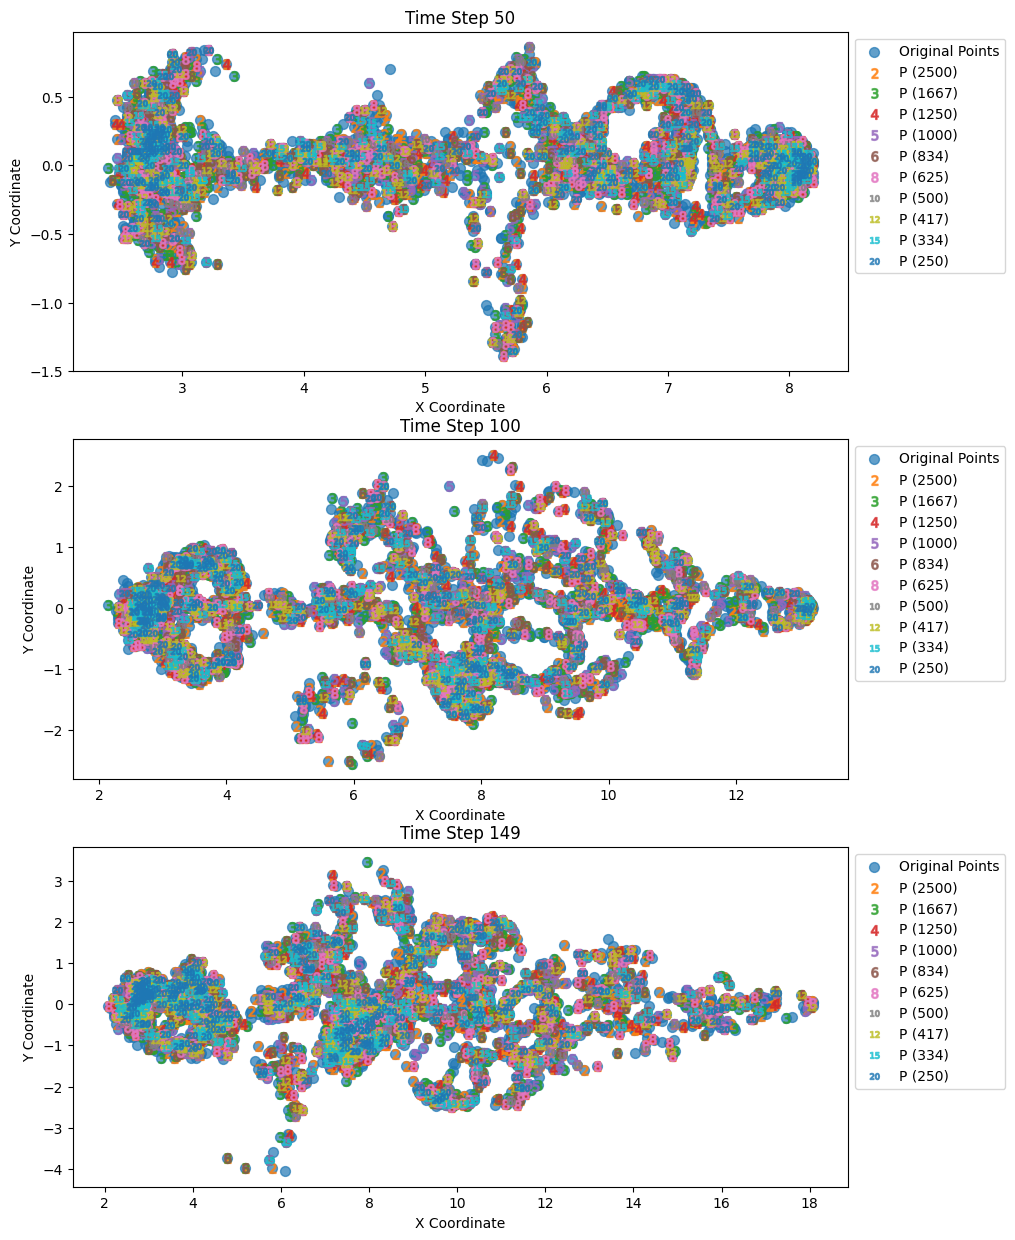

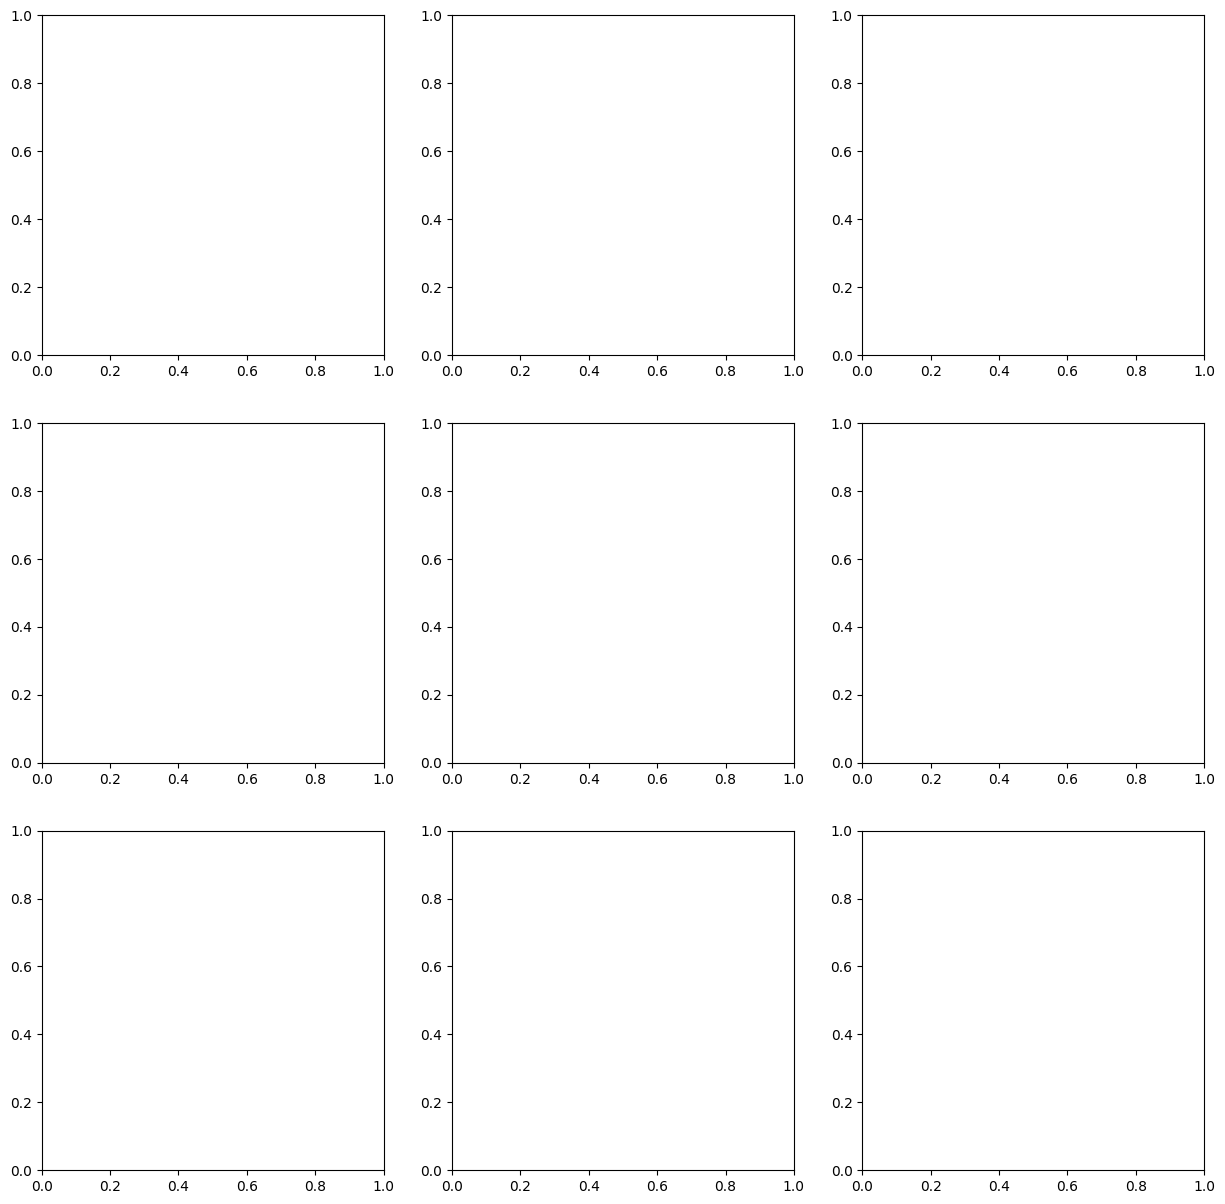

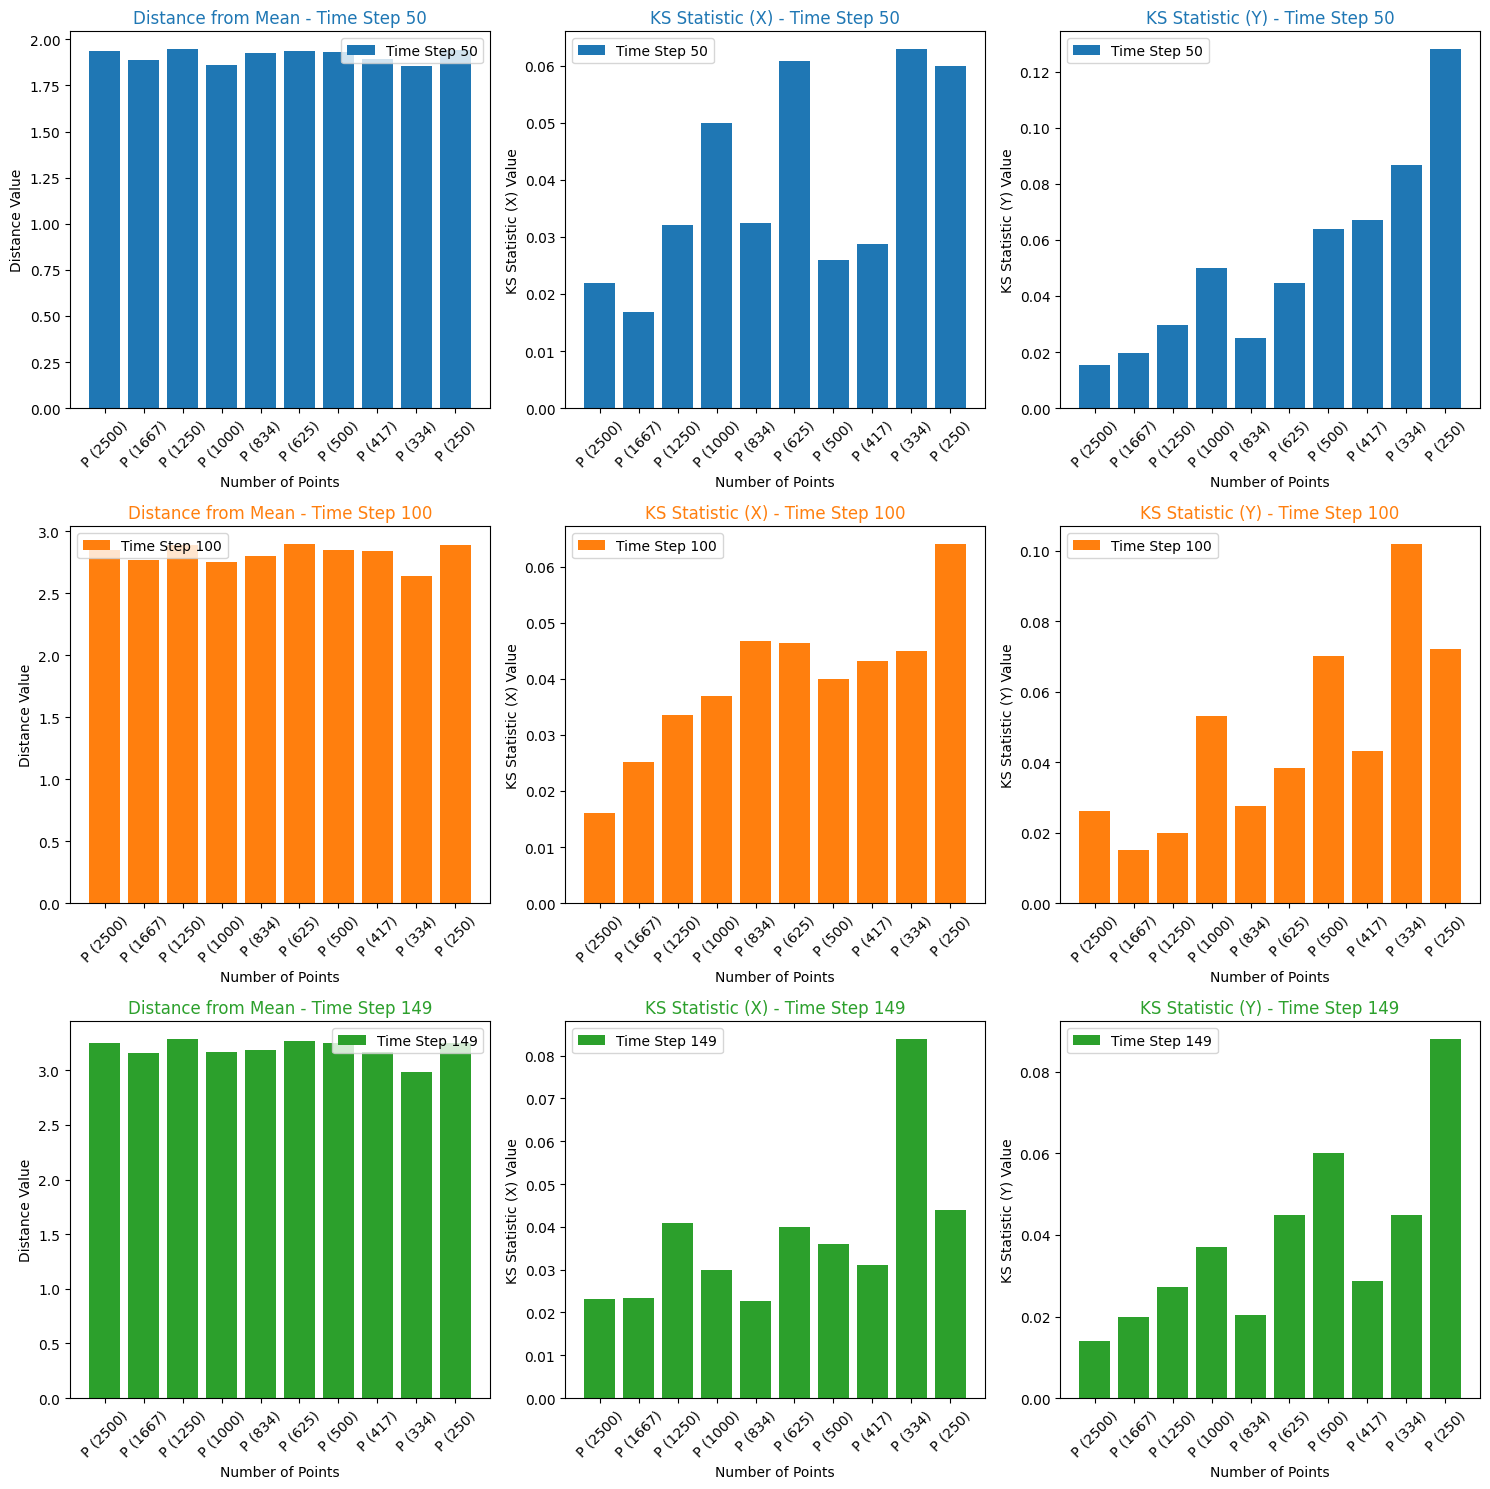

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy.stats import ks_2samp

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Function to calculate distance from mean point
def calculate_distance_from_mean(original_df, filtered_df):
    original_mean = original_df.mean()
    distances = np.sqrt((filtered_df['X'] - original_mean['X'])**2 + (filtered_df['Y'] - original_mean['Y'])**2)
    return distances.mean()

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Lists to store metric values for each pattern and time step
mse_values = []
mae_values = []
r2_values = []
distance_values = []
ks_x_values = []
ks_y_values = []

# Lists to store labels for each pattern
mse_labels = []
mae_labels = []
r2_labels = []
distance_labels = []
ks_x_labels = []
ks_y_labels = []

# Create subplots for original points and filtered points
fig_points, axes_points = plt.subplots(nrows=len(time_steps_to_plot), ncols=1, figsize=(10, 15))

# Create subplots for displaying metrics
fig_metrics, axes_metrics = plt.subplots(nrows=len(time_steps_to_plot), ncols=3, figsize=(15, 15))

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes_points[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label='Original Points',
        s=50,
        alpha=0.7,
        marker='o'
    )
    axes_points[i].set_title(f'Time Step {time_step}')
    axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes_points[i].set_xlabel('X Coordinate')
    axes_points[i].set_ylabel('Y Coordinate')

    # Store original points in a dataframe
    original_points = pd.DataFrame({
        'X': x_data[f'Column{time_step}'],
        'Y': y_data[f'Column{time_step}']
    })

    # Create a dictionary to store filtered points
    filtered_points = {}

    # Lists to store labels for each pattern
    mse_labels_time_step = []
    mae_labels_time_step = []
    r2_labels_time_step = []
    distance_labels_time_step = []
    ks_x_labels_time_step = []
    ks_y_labels_time_step = []

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Randomly sample the same number of points
        sampled_indices = np.random.choice(len(x_data), len(filtered_x_data), replace=False)
        sampled_x_data = x_data.iloc[sampled_indices]
        sampled_y_data = y_data.iloc[sampled_indices]

        # Plot filtered points
        axes_points[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'P ({len(filtered_x_data)})',
            s=50,
            alpha=0.7,
            marker=f'${pattern}$'
        )
        axes_points[i].set_title(f'Time Step {time_step}')
        axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))
        axes_points[i].set_xlabel('X Coordinate')
        axes_points[i].set_ylabel('Y Coordinate')

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([sampled_x_data[f'Column{time_step}'], sampled_y_data[f'Column{time_step}']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )
        distance_from_mean = calculate_distance_from_mean(original_points, filtered_points[f'Pattern_{pattern}'])
        ks_statistic_x, ks_p_value_x = ks_2samp(sampled_x_data[f'Column{time_step}'], filtered_x_data[f'Column{time_step}'])
        ks_statistic_y, ks_p_value_y = ks_2samp(sampled_y_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}'])

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)
        distance_values.append(distance_from_mean)
        ks_x_values.append(ks_statistic_x)
        ks_y_values.append(ks_statistic_y)

        # Store labels for each pattern
        mse_labels_time_step.append(f'P ({len(filtered_x_data)})')
        mae_labels_time_step.append(f'P ({len(filtered_x_data)})')
        r2_labels_time_step.append(f'P ({len(filtered_x_data)})')
        distance_labels_time_step.append(f'P ({len(filtered_x_data)})')
        ks_x_labels_time_step.append(f'P ({len(filtered_x_data)})')
        ks_y_labels_time_step.append(f'P ({len(filtered_x_data)})')

    # Store filtered dataframes in the dictionary
    filtered_dataframes[f'Time_Step_{time_step}'] = filtered_points

    # Store labels for each pattern and time step
    mse_labels.append(mse_labels_time_step)
    mae_labels.append(mae_labels_time_step)
    r2_labels.append(r2_labels_time_step)
    distance_labels.append(distance_labels_time_step)
    ks_x_labels.append(ks_x_labels_time_step)
    ks_y_labels.append(ks_y_labels_time_step)

# Save the metrics data to an Excel file
output_metrics_file_path = '/content/particleLocations_metrics.xlsx'
with pd.ExcelWriter(output_metrics_file_path) as writer:
    for i, time_step in enumerate(time_steps_to_plot):
        metrics_df = pd.DataFrame({
            'Pattern': mse_labels[i],
            'MSE': mse_values[i * len(patterns):(i + 1) * len(patterns)],
            'MAE': mae_values[i * len(patterns):(i + 1) * len(patterns)],
            'R2': r2_values[i * len(patterns):(i + 1) * len(patterns)],
            'Distance from Mean': distance_values[i * len(patterns):(i + 1) * len(patterns)],
            'KS Statistic (X)': ks_x_values[i * len(patterns):(i + 1) * len(patterns)],
            'KS Statistic (Y)': ks_y_values[i * len(patterns):(i + 1) * len(patterns)],
        })
        metrics_df.to_excel(writer, sheet_name=f'Time_Step_{time_step}', index=False)

# Create subplots for displaying metrics
fig_metrics, axes_metrics_extra = plt.subplots(nrows=len(time_steps_to_plot), ncols=3, figsize=(15, 15))

# Add subplots for displaying additional metrics
for i, time_step in enumerate(time_steps_to_plot):
    # Add a subplot for displaying distance from mean values
    axes_metrics_extra[i, 0].bar(range(len(patterns)), distance_values[i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=distance_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics_extra[i, 0].set_title(f'Distance from Mean - Time Step {time_step}', color=f'C{i}')
    axes_metrics_extra[i, 0].set_ylabel('Distance Value')  # Updated ylabel
    axes_metrics_extra[i, 0].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics_extra[i, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics_extra[i, 0].legend()

    # Add a subplot for displaying KS Statistic (X) values
    axes_metrics_extra[i, 1].bar(range(len(patterns)), ks_x_values[i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=ks_x_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics_extra[i, 1].set_title(f'KS Statistic (X) - Time Step {time_step}', color=f'C{i}')
    axes_metrics_extra[i, 1].set_ylabel('KS Statistic (X) Value')  # Updated ylabel
    axes_metrics_extra[i, 1].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics_extra[i, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics_extra[i, 1].legend()

    # Add a subplot for displaying KS Statistic (Y) values
    axes_metrics_extra[i, 2].bar(range(len(patterns)), ks_y_values[i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=ks_y_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics_extra[i, 2].set_title(f'KS Statistic (Y) - Time Step {time_step}', color=f'C{i}')
    axes_metrics_extra[i, 2].set_ylabel('KS Statistic (Y) Value')  # Updated ylabel
    axes_metrics_extra[i, 2].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics_extra[i, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics_extra[i, 2].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

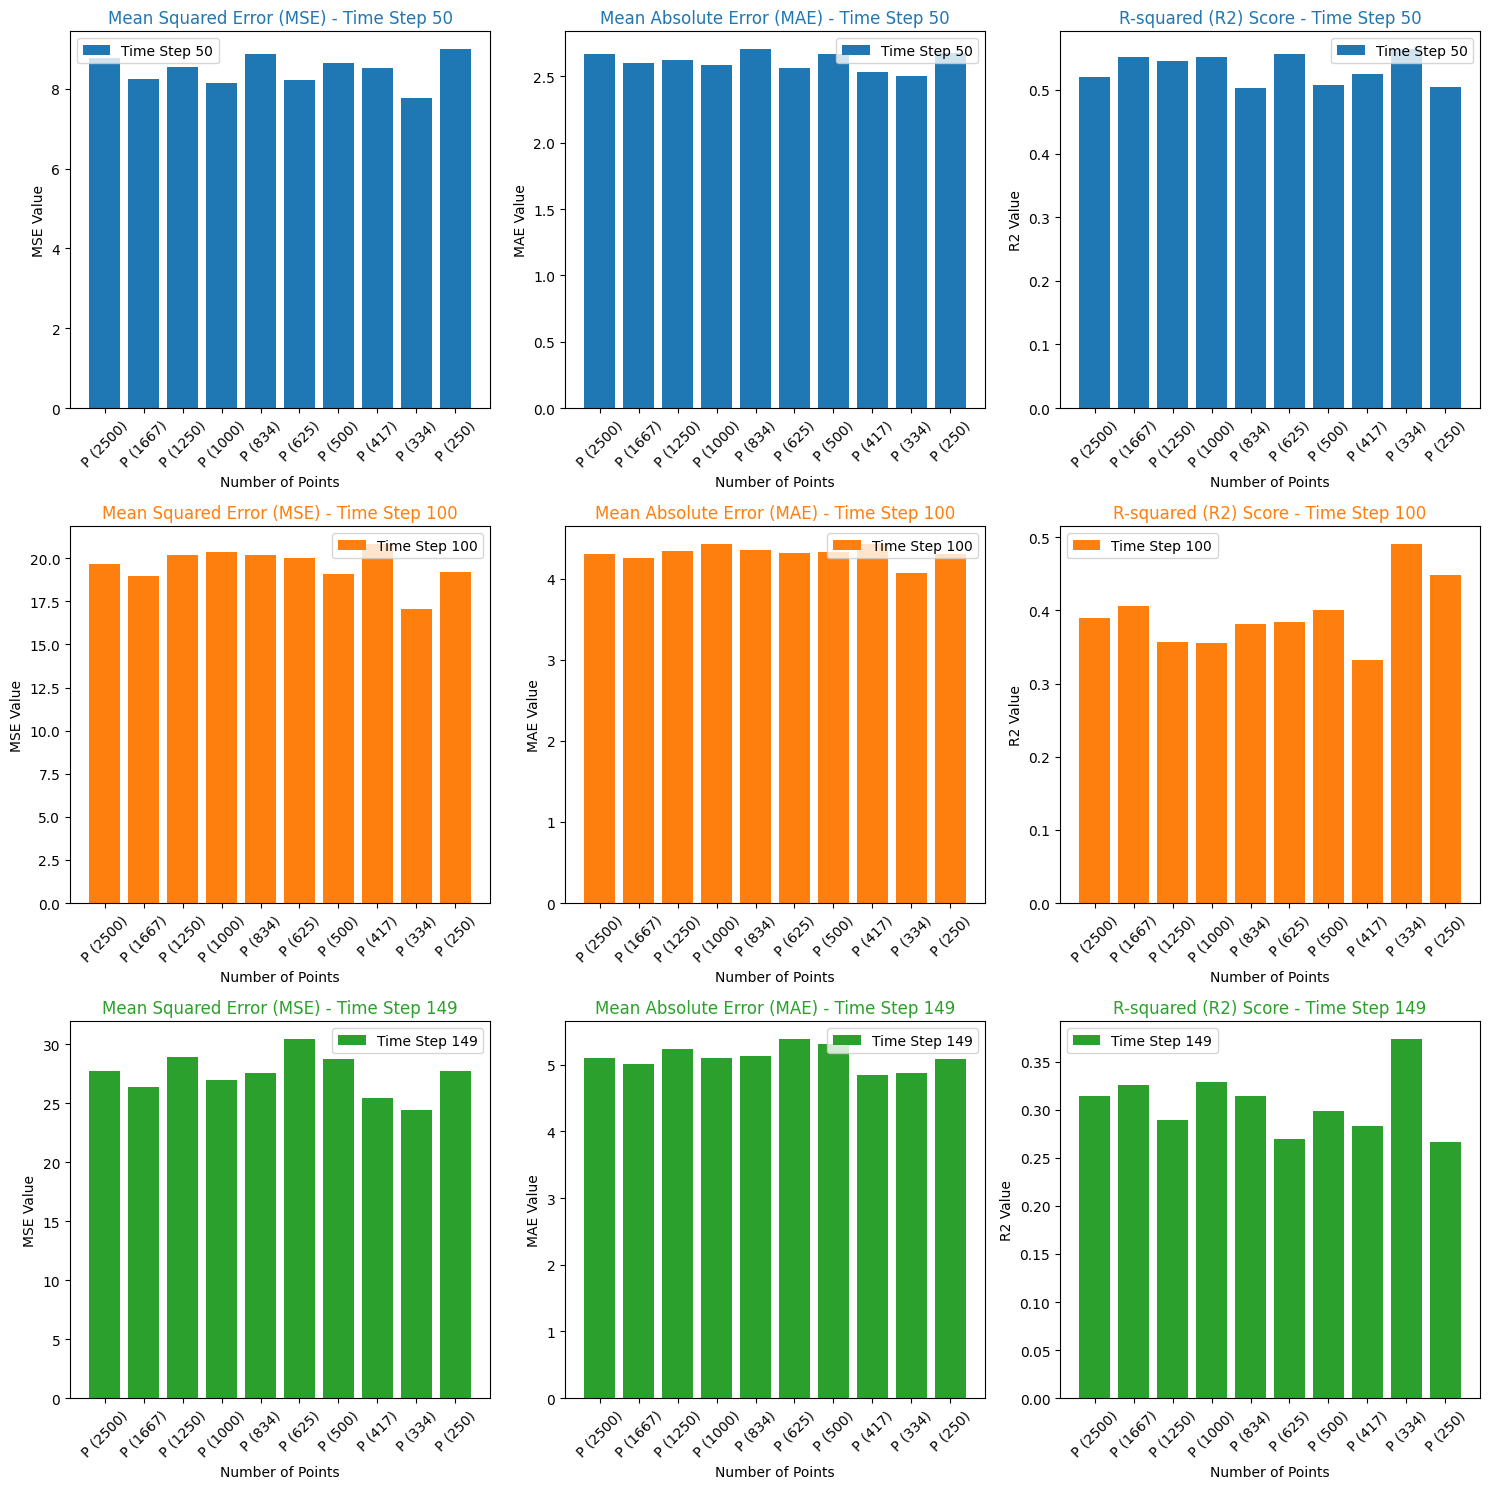

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ... (Previous code for loading data and defining functions)

# Lists to store MSE, MAE, and R2 values for each pattern and time step
mse_values = []
mae_values = []
r2_values = []

# Lists to store labels for each pattern
mse_labels = []
mae_labels = []
r2_labels = []

for i, time_step in enumerate(time_steps_to_plot):
    # ... (Previous code for plotting original and filtered points)

    # Create a dictionary to store filtered points
    filtered_points = {}

    # Lists to store labels for each pattern
    mse_labels_time_step = []
    mae_labels_time_step = []
    r2_labels_time_step = []

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Randomly sample the same number of points
        sampled_indices = np.random.choice(len(x_data), len(filtered_x_data), replace=False)
        sampled_x_data = x_data.iloc[sampled_indices]
        sampled_y_data = y_data.iloc[sampled_indices]

        # ... (Previous code for plotting filtered points)

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([sampled_x_data[f'Column{time_step}'], sampled_y_data[f'Column{time_step}']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)

        # Store labels for each pattern
        mse_labels_time_step.append(f'P ({len(filtered_x_data)})')
        mae_labels_time_step.append(f'P ({len(filtered_x_data)})')
        r2_labels_time_step.append(f'P ({len(filtered_x_data)})')

    # Store labels for each pattern and time step
    mse_labels.append(mse_labels_time_step)
    mae_labels.append(mae_labels_time_step)
    r2_labels.append(r2_labels_time_step)

# ... (Previous code for saving the filtered data to Excel)

# Create subplots for displaying metrics
fig_metrics, axes_metrics = plt.subplots(nrows=len(time_steps_to_plot), ncols=3, figsize=(15, 15))

# Add subplots for displaying MSE, MAE, and R2 values for each time step
for i, time_step in enumerate(time_steps_to_plot):
    # Add a subplot for displaying MSE values
    axes_metrics[i, 0].bar(range(len(patterns)), mse_values[i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=mse_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 0].set_title(f'Mean Squared Error (MSE) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 0].set_ylabel('MSE Value')  # Updated ylabel
    axes_metrics[i, 0].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 0].legend()

    # Add a subplot for displaying MAE values
    axes_metrics[i, 1].bar(range(len(patterns)), mae_values[i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=mae_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 1].set_title(f'Mean Absolute Error (MAE) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 1].set_ylabel('MAE Value')  # Updated ylabel
    axes_metrics[i, 1].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 1].legend()

    # Add a subplot for displaying R2 values
    axes_metrics[i, 2].bar(range(len(patterns)), r2_values[i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=r2_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 2].set_title(f'R-squared (R2) Score - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 2].set_ylabel('R2 Value')  # Updated ylabel
    axes_metrics[i, 2].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


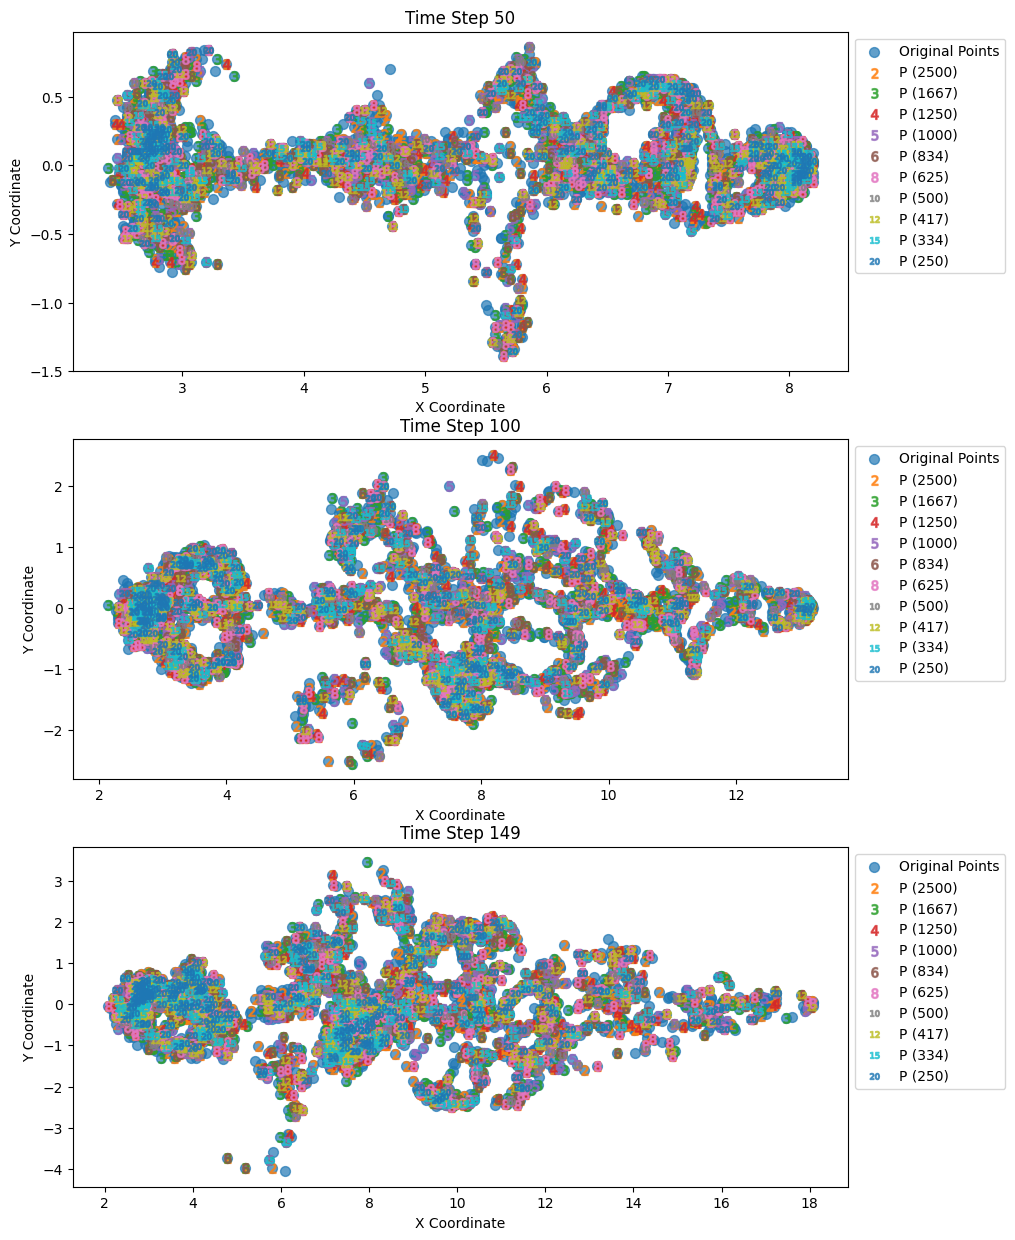

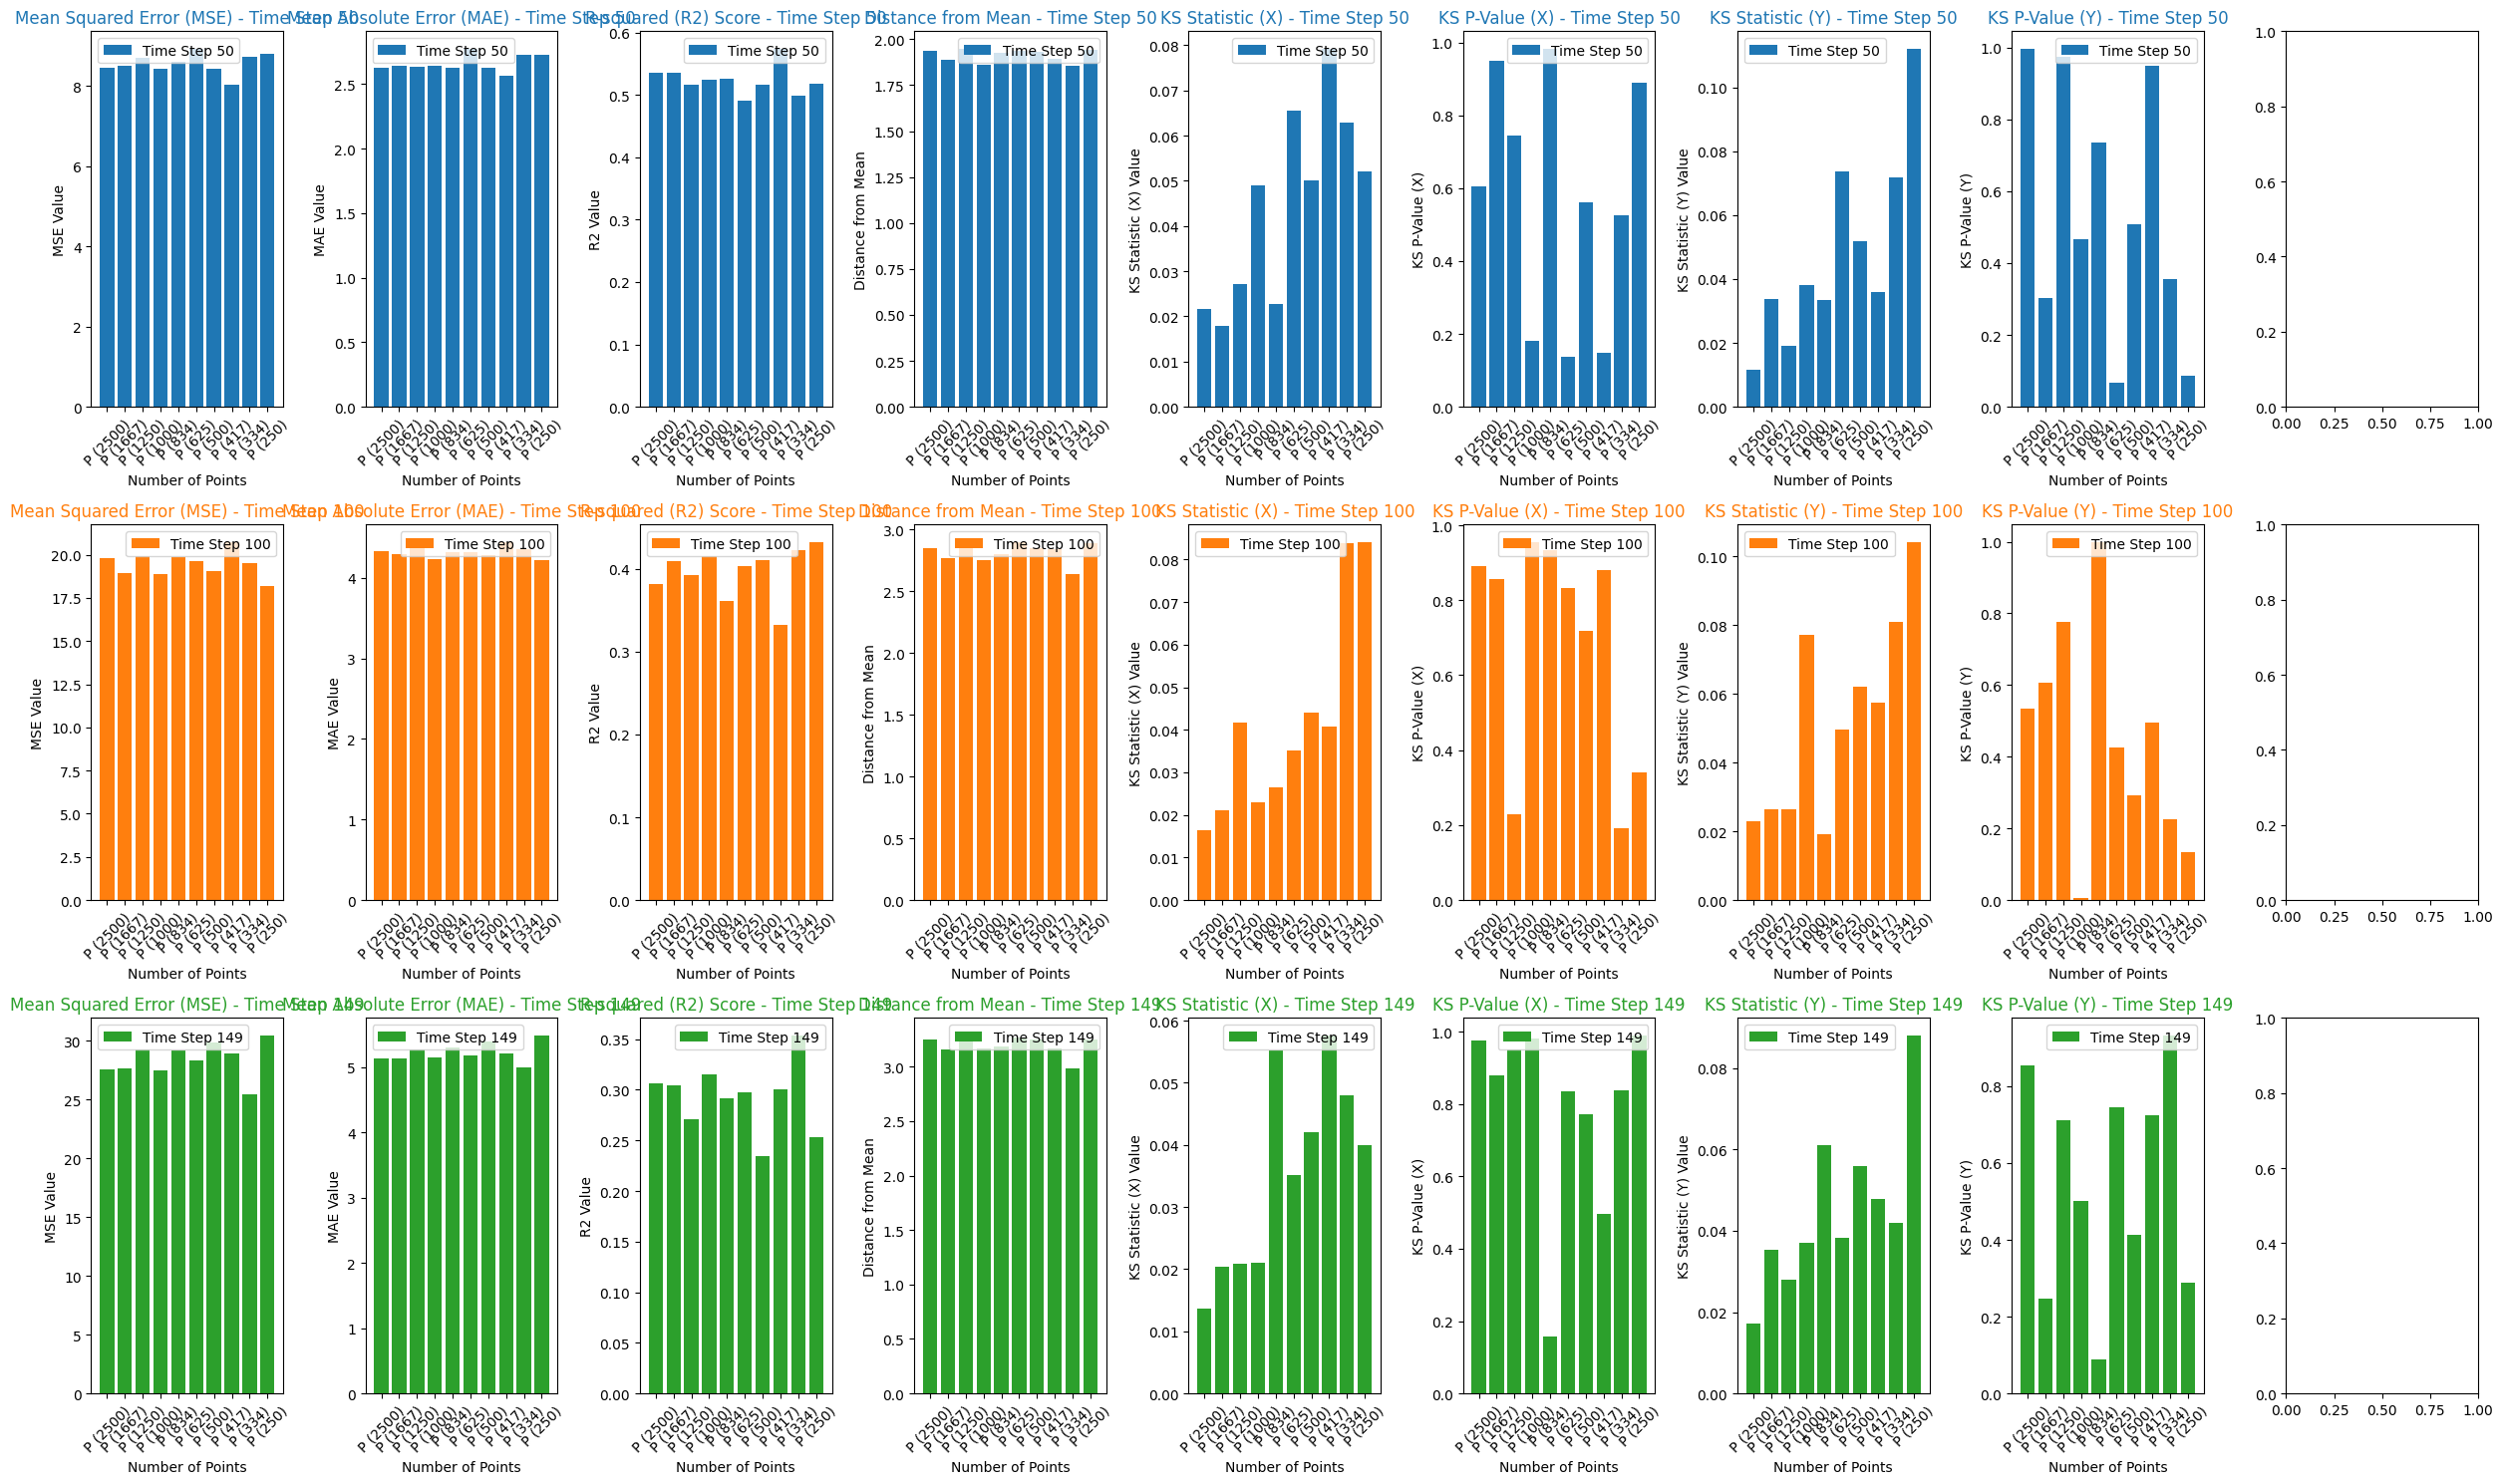

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy.stats import ks_2samp

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df, pattern):
    filtered_df = df[df.index % pattern == 1]
    return filtered_df

# Function to calculate distance from mean point
def calculate_distance_from_mean(original_df, filtered_df):
    original_mean = original_df.mean()
    distances = np.sqrt((filtered_df['X'] - original_mean['X'])**2 + (filtered_df['Y'] - original_mean['Y'])**2)
    return distances.mean()

# Specify the patterns to filter
patterns = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20]

# Select the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Create subplots for original points and filtered points
fig_points, axes_points = plt.subplots(nrows=len(time_steps_to_plot), ncols=1, figsize=(10, 15))

# Lists to store metrics values for each pattern and time step
metrics_values = {
    'mse': [],
    'mae': [],
    'r2': [],
    'distance_from_mean': [],
    'ks_statistic_x': [],
    'ks_p_value_x': [],
    'ks_statistic_y': [],
    'ks_p_value_y': []
}

# Create a dictionary to store filtered dataframes
filtered_dataframes = {}

# Lists to store labels for each pattern
mse_labels = []
mae_labels = []
r2_labels = []
distance_from_mean_labels = []
ks_labels_x = []
ks_labels_y = []

for i, time_step in enumerate(time_steps_to_plot):
    # Plot original points
    axes_points[i].scatter(
        x_data[f'Column{time_step}'],
        y_data[f'Column{time_step}'],
        label='Original Points',
        s=50,
        alpha=0.7,
        marker='o'  # Use a circular marker for original points
    )
    axes_points[i].set_title(f'Time Step {time_step}')
    axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
    axes_points[i].set_xlabel('X Coordinate')
    axes_points[i].set_ylabel('Y Coordinate')

    # Store original points in a dataframe
    original_points = pd.DataFrame({
        'X': x_data[f'Column{time_step}'],
        'Y': y_data[f'Column{time_step}']
    })

    # Create a dictionary to store filtered points
    filtered_points = {}

    # Lists to store labels for each pattern
    mse_labels_time_step = []
    mae_labels_time_step = []
    r2_labels_time_step = []
    distance_from_mean_labels_time_step = []
    ks_labels_x_time_step = []
    ks_labels_y_time_step = []

    for j, pattern in enumerate(patterns):
        filtered_x_data = filter_rows(x_data, pattern)
        filtered_y_data = filter_rows(y_data, pattern)

        # Randomly sample the same number of points
        sampled_indices = np.random.choice(len(x_data), len(filtered_x_data), replace=False)
        sampled_x_data = x_data.iloc[sampled_indices]
        sampled_y_data = y_data.iloc[sampled_indices]

        # Plot filtered points
        axes_points[i].scatter(
            filtered_x_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}'],
            label=f'P ({len(filtered_x_data)})',  # Modified label
            s=50,
            alpha=0.7,
            marker=f'${pattern}$'  # Use different markers for different patterns
        )
        axes_points[i].set_title(f'Time Step {time_step}')
        axes_points[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside on the right side
        axes_points[i].set_xlabel('X Coordinate')
        axes_points[i].set_ylabel('Y Coordinate')

        # Store filtered points in a dataframe
        filtered_points[f'Pattern_{pattern}'] = pd.DataFrame({
            'X': filtered_x_data[f'Column{time_step}'],
            'Y': filtered_y_data[f'Column{time_step}']
        })

        # Calculate metrics and store the values
        mse = mean_squared_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_squared_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        mae = mean_absolute_error(
            sampled_x_data[f'Column{time_step}'],
            filtered_x_data[f'Column{time_step}']
        ) + mean_absolute_error(
            sampled_y_data[f'Column{time_step}'],
            filtered_y_data[f'Column{time_step}']
        )
        r2 = r2_score(
            np.concatenate([sampled_x_data[f'Column{time_step}'], sampled_y_data[f'Column{time_step}']]),
            np.concatenate([filtered_x_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}']])
        )

        distance_from_mean = calculate_distance_from_mean(original_points, filtered_points[f'Pattern_{pattern}'])
        ks_statistic_x, ks_p_value_x = ks_2samp(sampled_x_data[f'Column{time_step}'], filtered_x_data[f'Column{time_step}'])
        ks_statistic_y, ks_p_value_y = ks_2samp(sampled_y_data[f'Column{time_step}'], filtered_y_data[f'Column{time_step}'])

        # Append values to lists
        metrics_values['mse'].append(mse)
        metrics_values['mae'].append(mae)
        metrics_values['r2'].append(r2)
        metrics_values['distance_from_mean'].append(distance_from_mean)
        metrics_values['ks_statistic_x'].append(ks_statistic_x)
        metrics_values['ks_p_value_x'].append(ks_p_value_x)
        metrics_values['ks_statistic_y'].append(ks_statistic_y)
        metrics_values['ks_p_value_y'].append(ks_p_value_y)

        # Store labels for each pattern
        mse_labels_time_step.append(f'P ({len(filtered_x_data)})')
        mae_labels_time_step.append(f'P ({len(filtered_x_data)})')
        r2_labels_time_step.append(f'P ({len(filtered_x_data)})')
        distance_from_mean_labels_time_step.append(f'P ({len(filtered_x_data)})')
        ks_labels_x_time_step.append(f'P ({len(filtered_x_data)})')
        ks_labels_y_time_step.append(f'P ({len(filtered_x_data)})')

    # Store filtered dataframes in the dictionary
    filtered_dataframes[f'Time_Step_{time_step}'] = filtered_points

    # Store labels for each pattern and time step
    mse_labels.append(mse_labels_time_step)
    mae_labels.append(mae_labels_time_step)
    r2_labels.append(r2_labels_time_step)
    distance_from_mean_labels.append(distance_from_mean_labels_time_step)
    ks_labels_x.append(ks_labels_x_time_step)
    ks_labels_y.append(ks_labels_y_time_step)

# Function to calculate distance from mean point
def calculate_distance_from_mean(original_df, filtered_df):
    original_mean = original_df.mean()
    distances = np.sqrt((filtered_df['X'] - original_mean['X'])**2 + (filtered_df['Y'] - original_mean['Y'])**2)
    return distances.mean()

# Save the filtered data to an Excel file with a sheet for metrics
output_file_path = '/content/particleLocations_filtered_metrics_random_sampling.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for time_step, filtered_points_df in filtered_dataframes.items():
        for pattern, df in filtered_points_df.items():
            df.to_excel(writer, sheet_name=f'{time_step}_{pattern}', index=False)

# Create subplots for displaying metrics
fig_metrics, axes_metrics = plt.subplots(nrows=len(time_steps_to_plot), ncols=9, figsize=(25, 15))

# Add subplots for displaying MSE, MAE, R2, KS Statistic (X), and KS P-Value (X) values for each time step
for i, time_step in enumerate(time_steps_to_plot):
    # Add a subplot for displaying MSE values
    axes_metrics[i, 0].bar(range(len(patterns)), metrics_values['mse'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=mse_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 0].set_title(f'Mean Squared Error (MSE) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 0].set_ylabel('MSE Value')  # Updated ylabel
    axes_metrics[i, 0].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 0].legend()

    # Add a subplot for displaying MAE values
    axes_metrics[i, 1].bar(range(len(patterns)), metrics_values['mae'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=mae_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 1].set_title(f'Mean Absolute Error (MAE) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 1].set_ylabel('MAE Value')  # Updated ylabel
    axes_metrics[i, 1].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 1].legend()

    # Add a subplot for displaying R2 values
    axes_metrics[i, 2].bar(range(len(patterns)), metrics_values['r2'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=r2_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 2].set_title(f'R-squared (R2) Score - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 2].set_ylabel('R2 Value')  # Updated ylabel
    axes_metrics[i, 2].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 2].legend()

    # Add a subplot for displaying Distance from Mean values
    axes_metrics[i, 3].bar(range(len(patterns)), metrics_values['distance_from_mean'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=distance_from_mean_labels[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 3].set_title(f'Distance from Mean - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 3].set_ylabel('Distance from Mean')  # Updated ylabel
    axes_metrics[i, 3].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 3].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 3].legend()

    # Add a subplot for displaying KS Statistic (X) values
    axes_metrics[i, 4].bar(range(len(patterns)), metrics_values['ks_statistic_x'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=ks_labels_x[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 4].set_title(f'KS Statistic (X) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 4].set_ylabel('KS Statistic (X) Value')  # Updated ylabel
    axes_metrics[i, 4].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 4].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 4].legend()

    # Add a subplot for displaying KS P-Value (X) values
    axes_metrics[i, 5].bar(range(len(patterns)), metrics_values['ks_p_value_x'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=ks_labels_x[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 5].set_title(f'KS P-Value (X) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 5].set_ylabel('KS P-Value (X)')  # Updated ylabel
    axes_metrics[i, 5].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 5].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 5].legend()

    # Add a subplot for displaying KS Statistic (Y) values
    axes_metrics[i, 6].bar(range(len(patterns)), metrics_values['ks_statistic_y'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=ks_labels_y[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 6].set_title(f'KS Statistic (Y) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 6].set_ylabel('KS Statistic (Y) Value')  # Updated ylabel
    axes_metrics[i, 6].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 6].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 6].legend()

    # Add a subplot for displaying KS P-Value (Y) values
    axes_metrics[i, 7].bar(range(len(patterns)), metrics_values['ks_p_value_y'][i * len(patterns):(i + 1) * len(patterns)],
                            tick_label=ks_labels_y[i],
                            label=f'Time Step {time_step}', color=f'C{i}')

    axes_metrics[i, 7].set_title(f'KS P-Value (Y) - Time Step {time_step}', color=f'C{i}')
    axes_metrics[i, 7].set_ylabel('KS P-Value (Y)')  # Updated ylabel
    axes_metrics[i, 7].set_xlabel('Number of Points')  # Updated xlabel
    axes_metrics[i, 7].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axes_metrics[i, 7].legend()

# Adjust layout
plt.tight_layout()
plt.show()